In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec
from scipy.optimize import leastsq



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Checking how well the possion stats thing works for COS data, can appy it to MUSCLES as well.

In [4]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/'
x1ds = glob.glob('{}*x1dsum.fits'.format(path))
x1ds

['/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/leoo04010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/leoo06010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/leoo11010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/leoo12010_x1dsum.fits']

/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/leoo04010_x1dsum.fits
G130M


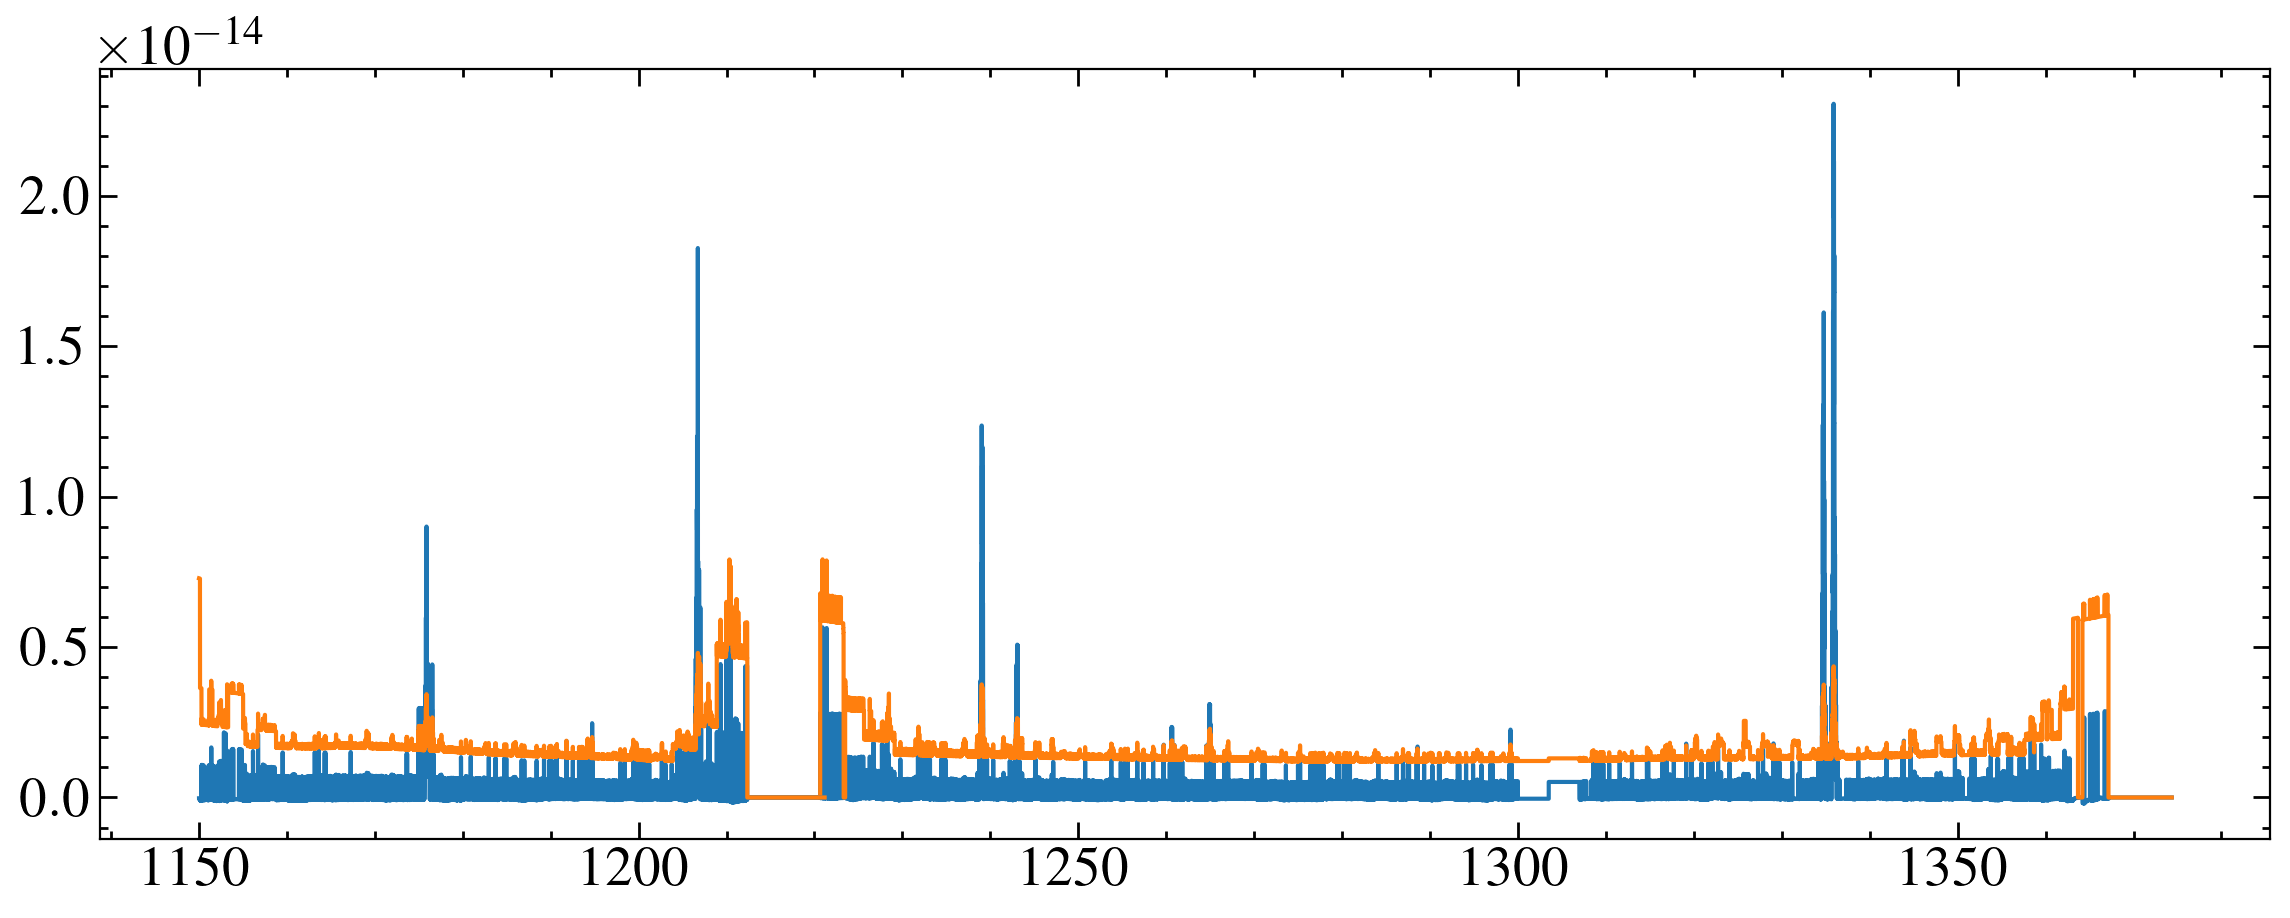

/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/leoo06010_x1dsum.fits
G130M


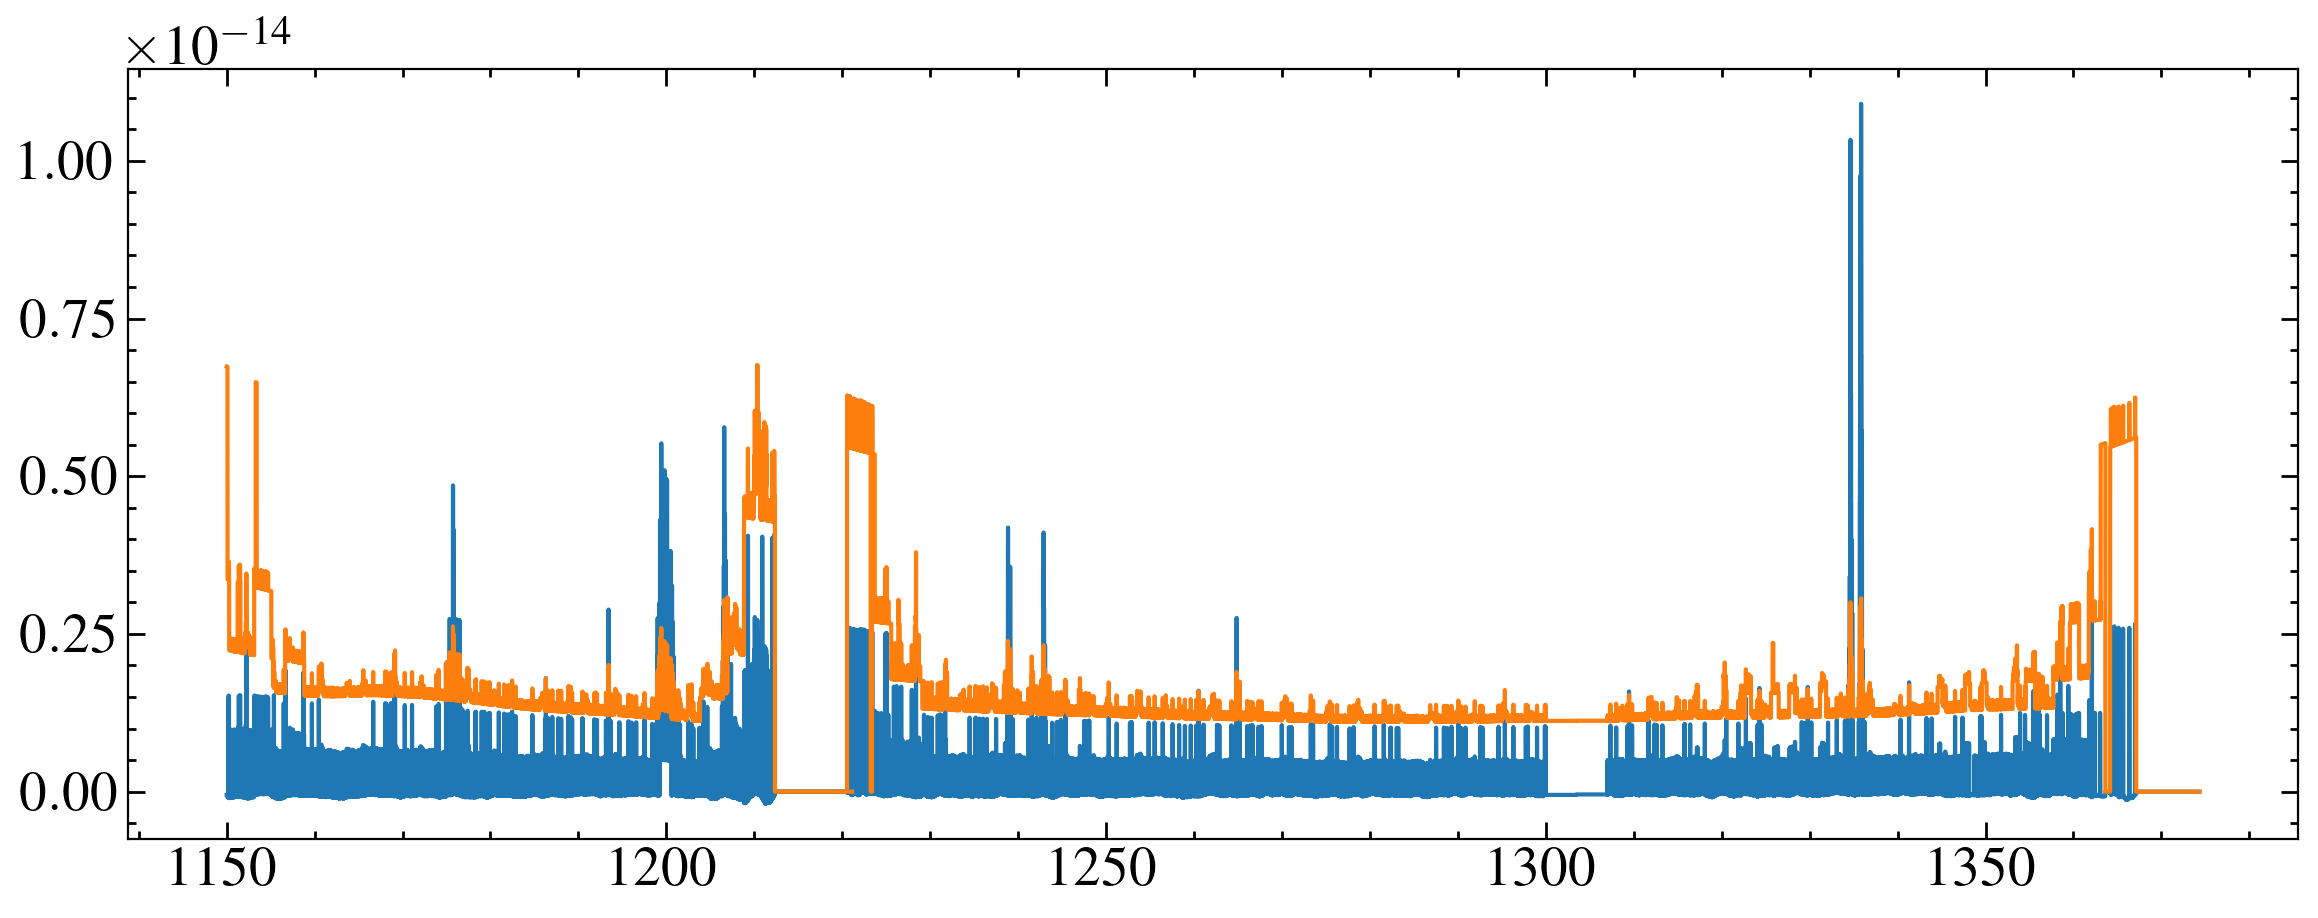

/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/leoo11010_x1dsum.fits
G130M


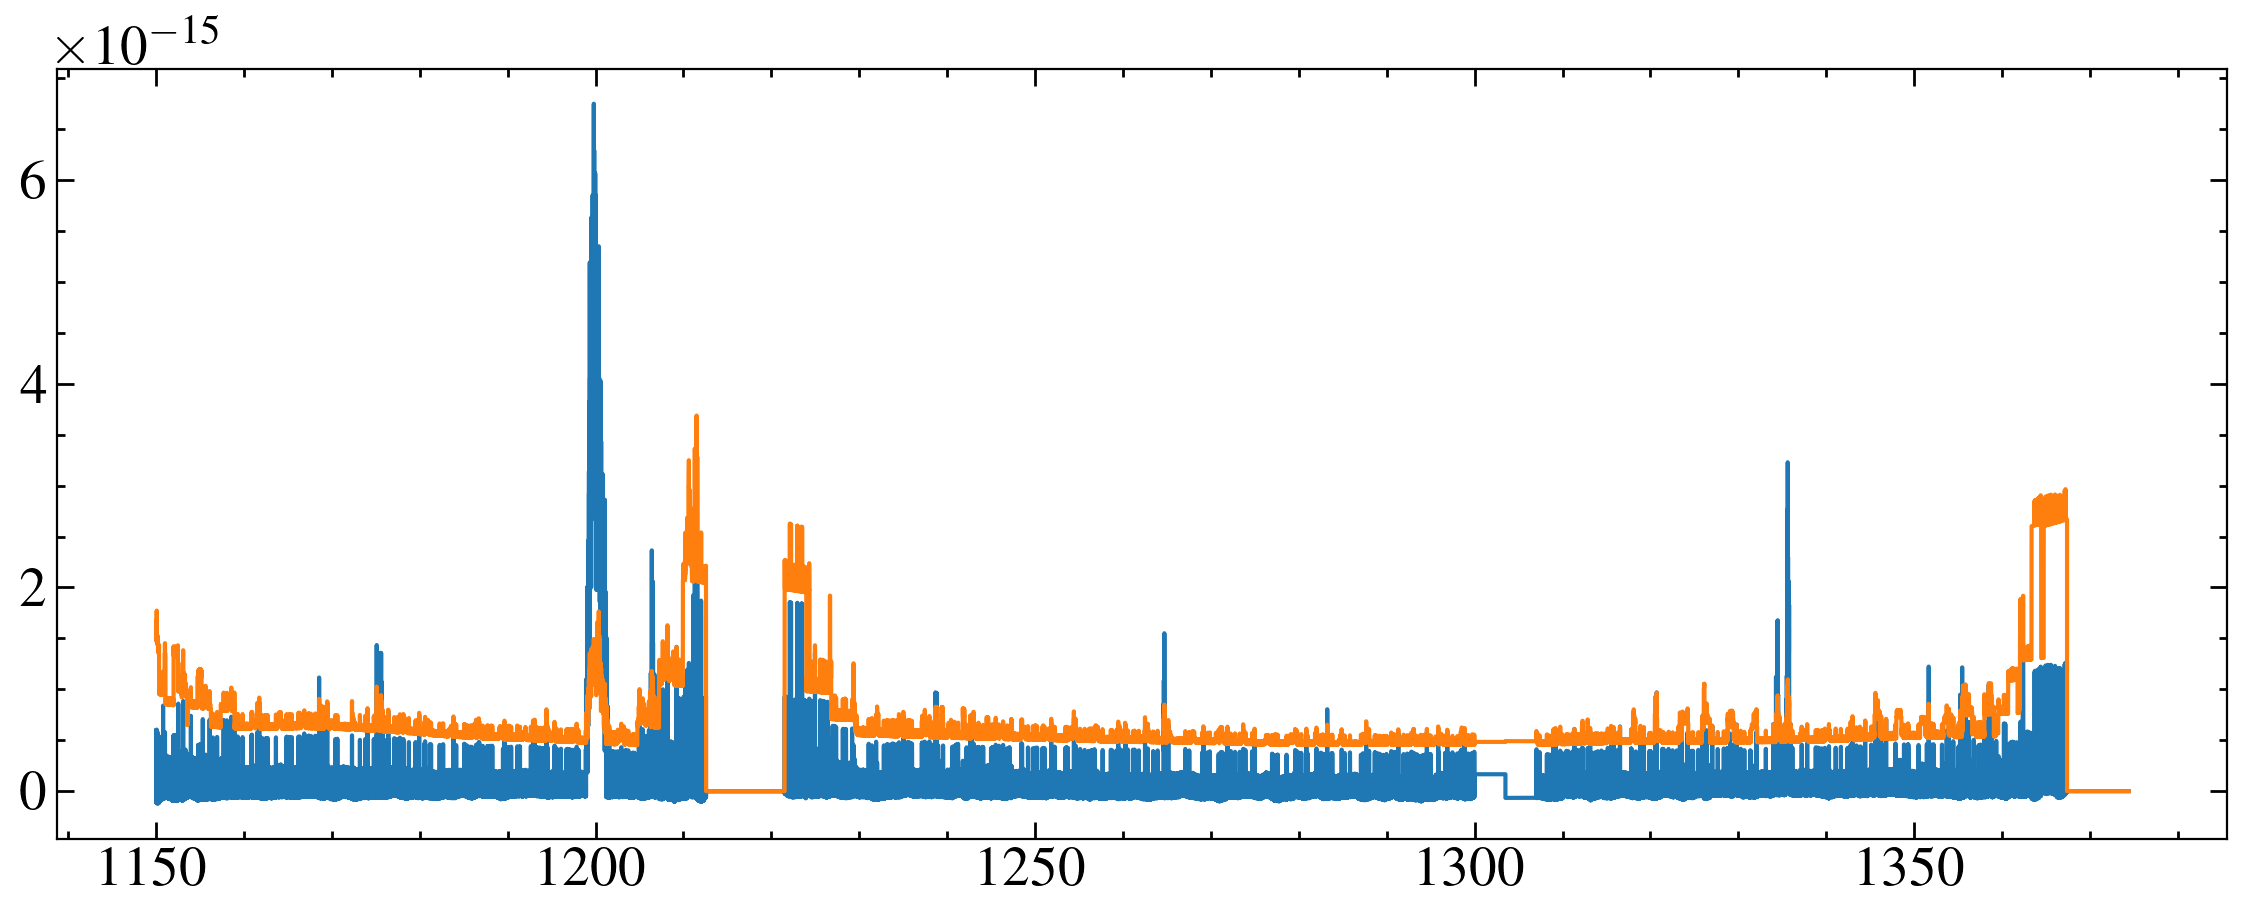

/media/david/2tb_ext_hd/hddata/meats/hst/cos_x1ds/leoo12010_x1dsum.fits
G130M


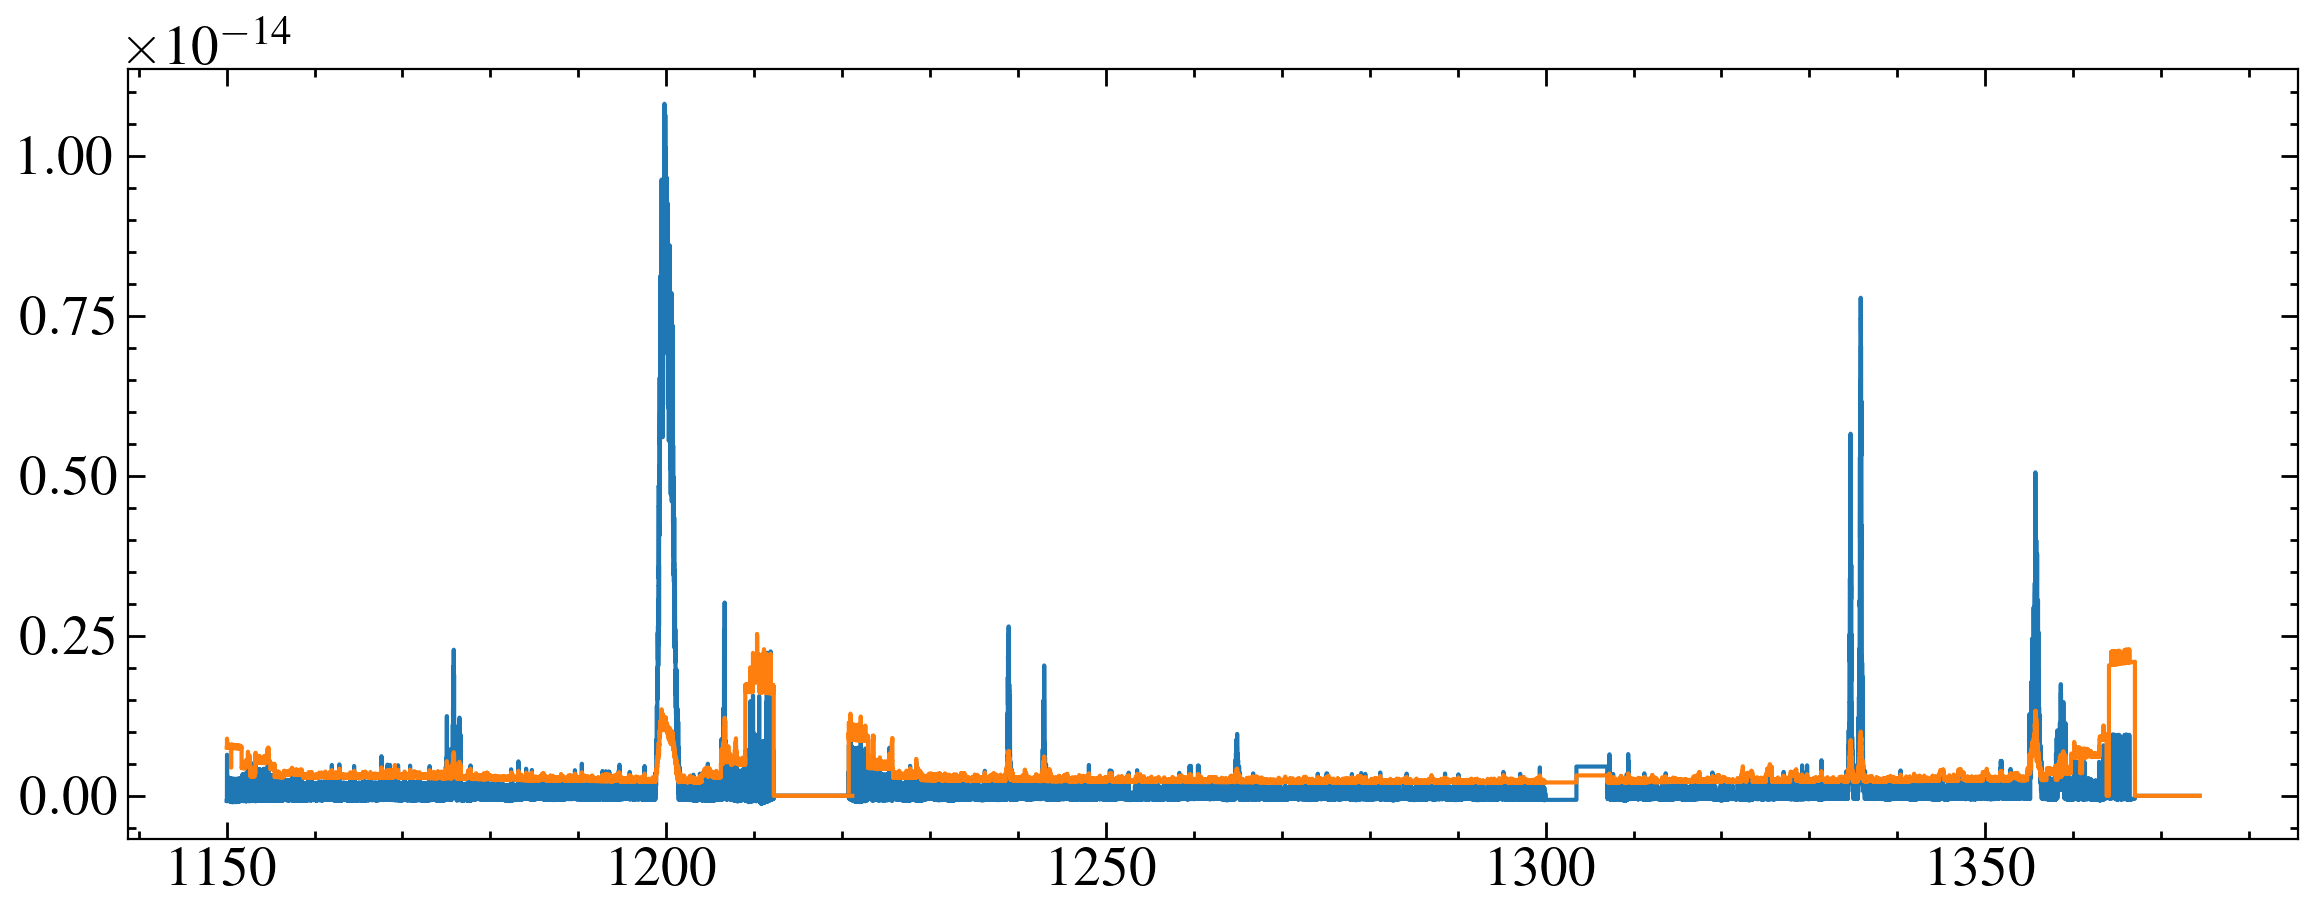

In [12]:
 for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    for dt in data:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = (w > 1150) & (w < 1300) | (w > 1307)
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        plt.step(w, e, where='mid', c='C1')
    plt.show()


ok looks like we're good here. Try with MM?

In [14]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/'
x1ds = glob.glob('{}*x1dsum.fits'.format(path))
x1ds

['/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm01010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm01020_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm01030_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm02010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm05010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm11010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm13010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm13020_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm13030_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm14010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm16010_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm16020_x1dsum.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm01010_x1dsum.fits
G160M


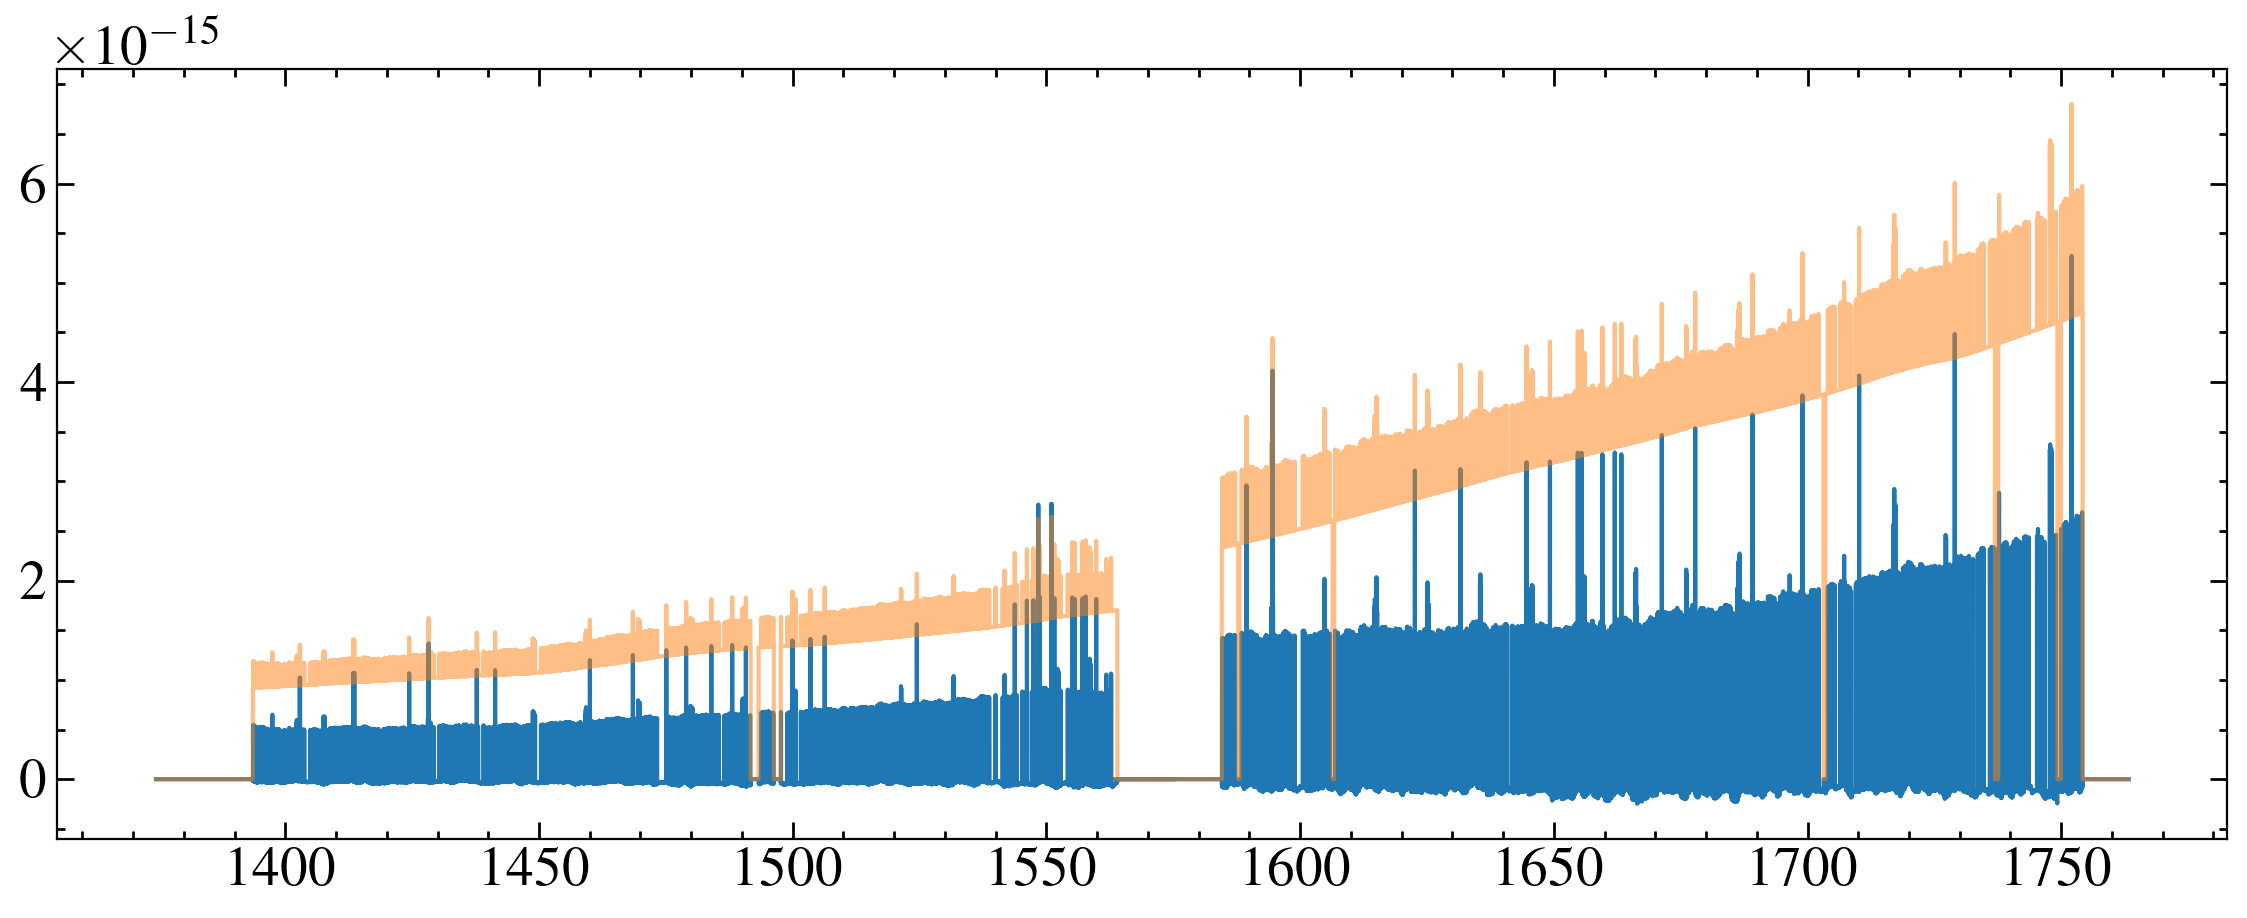

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm01020_x1dsum.fits
G160M


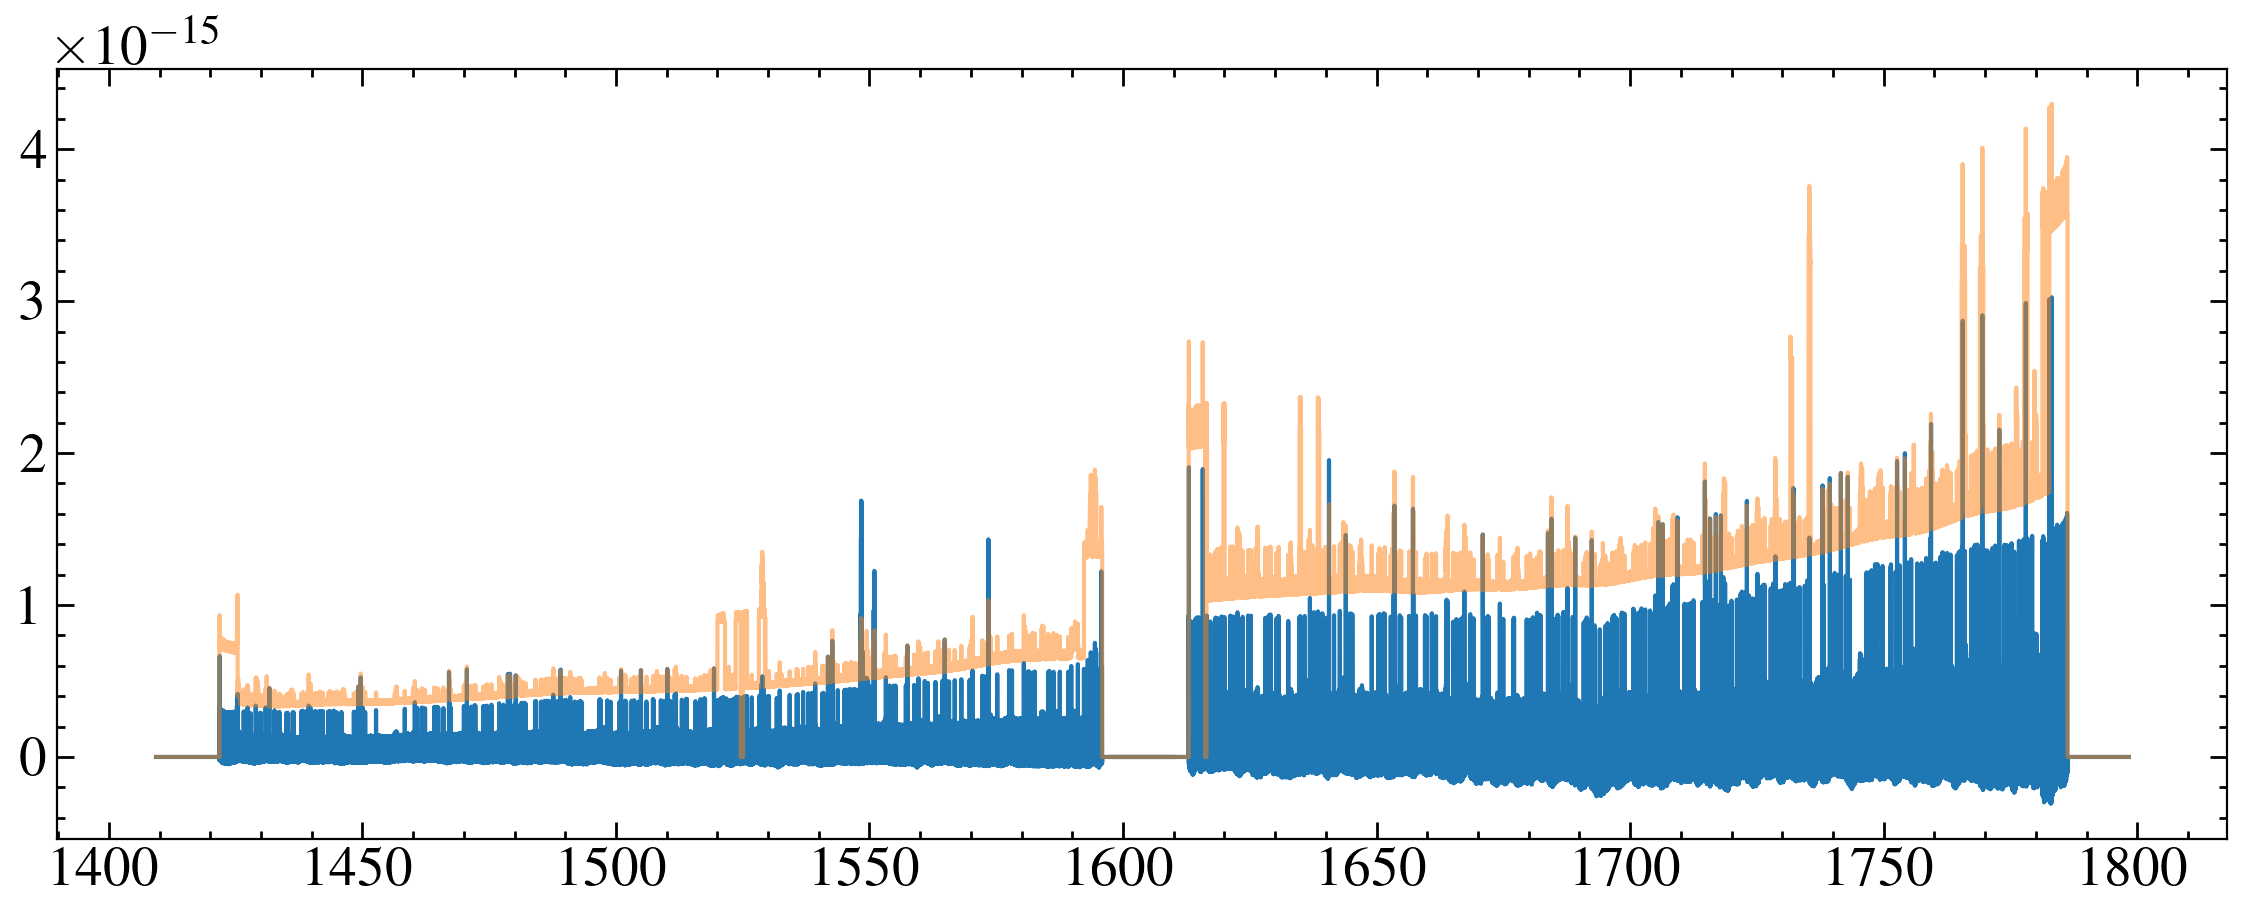

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm01030_x1dsum.fits
G230L


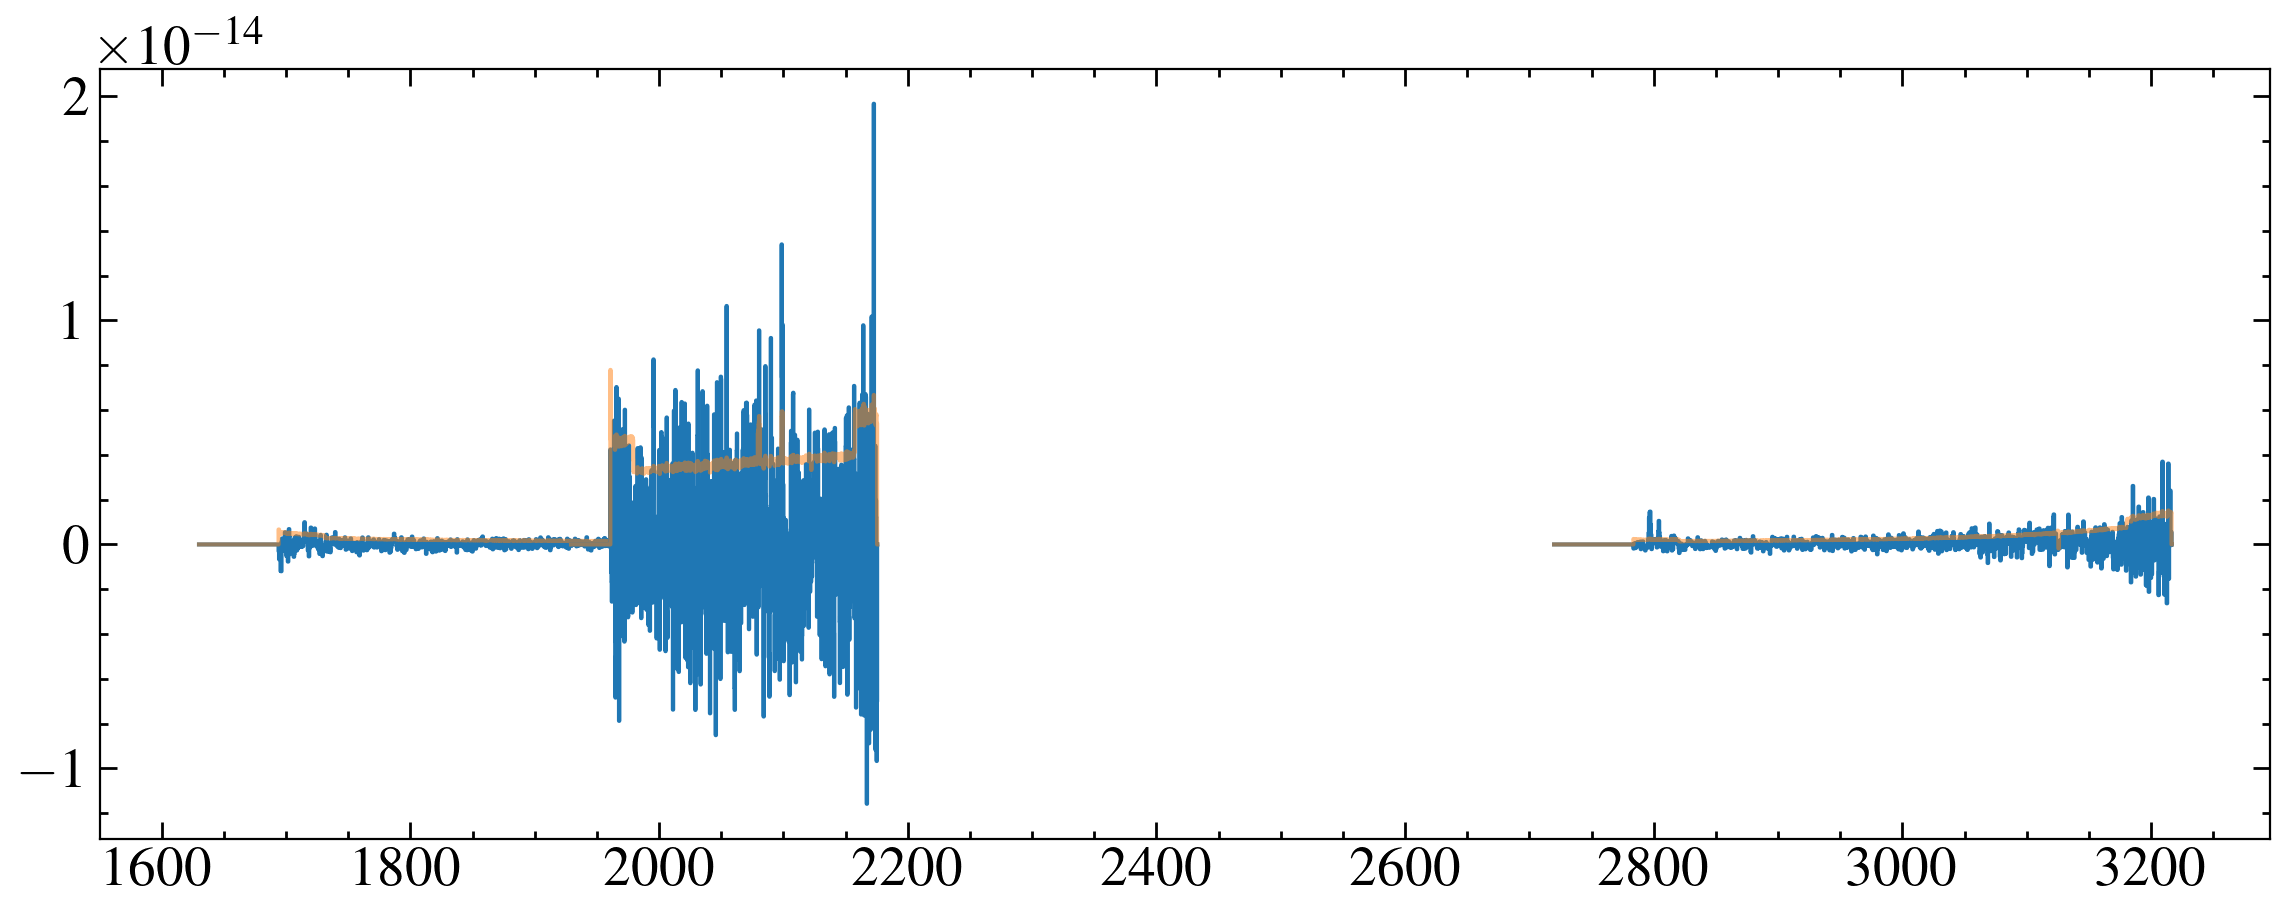

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm02010_x1dsum.fits
G130M


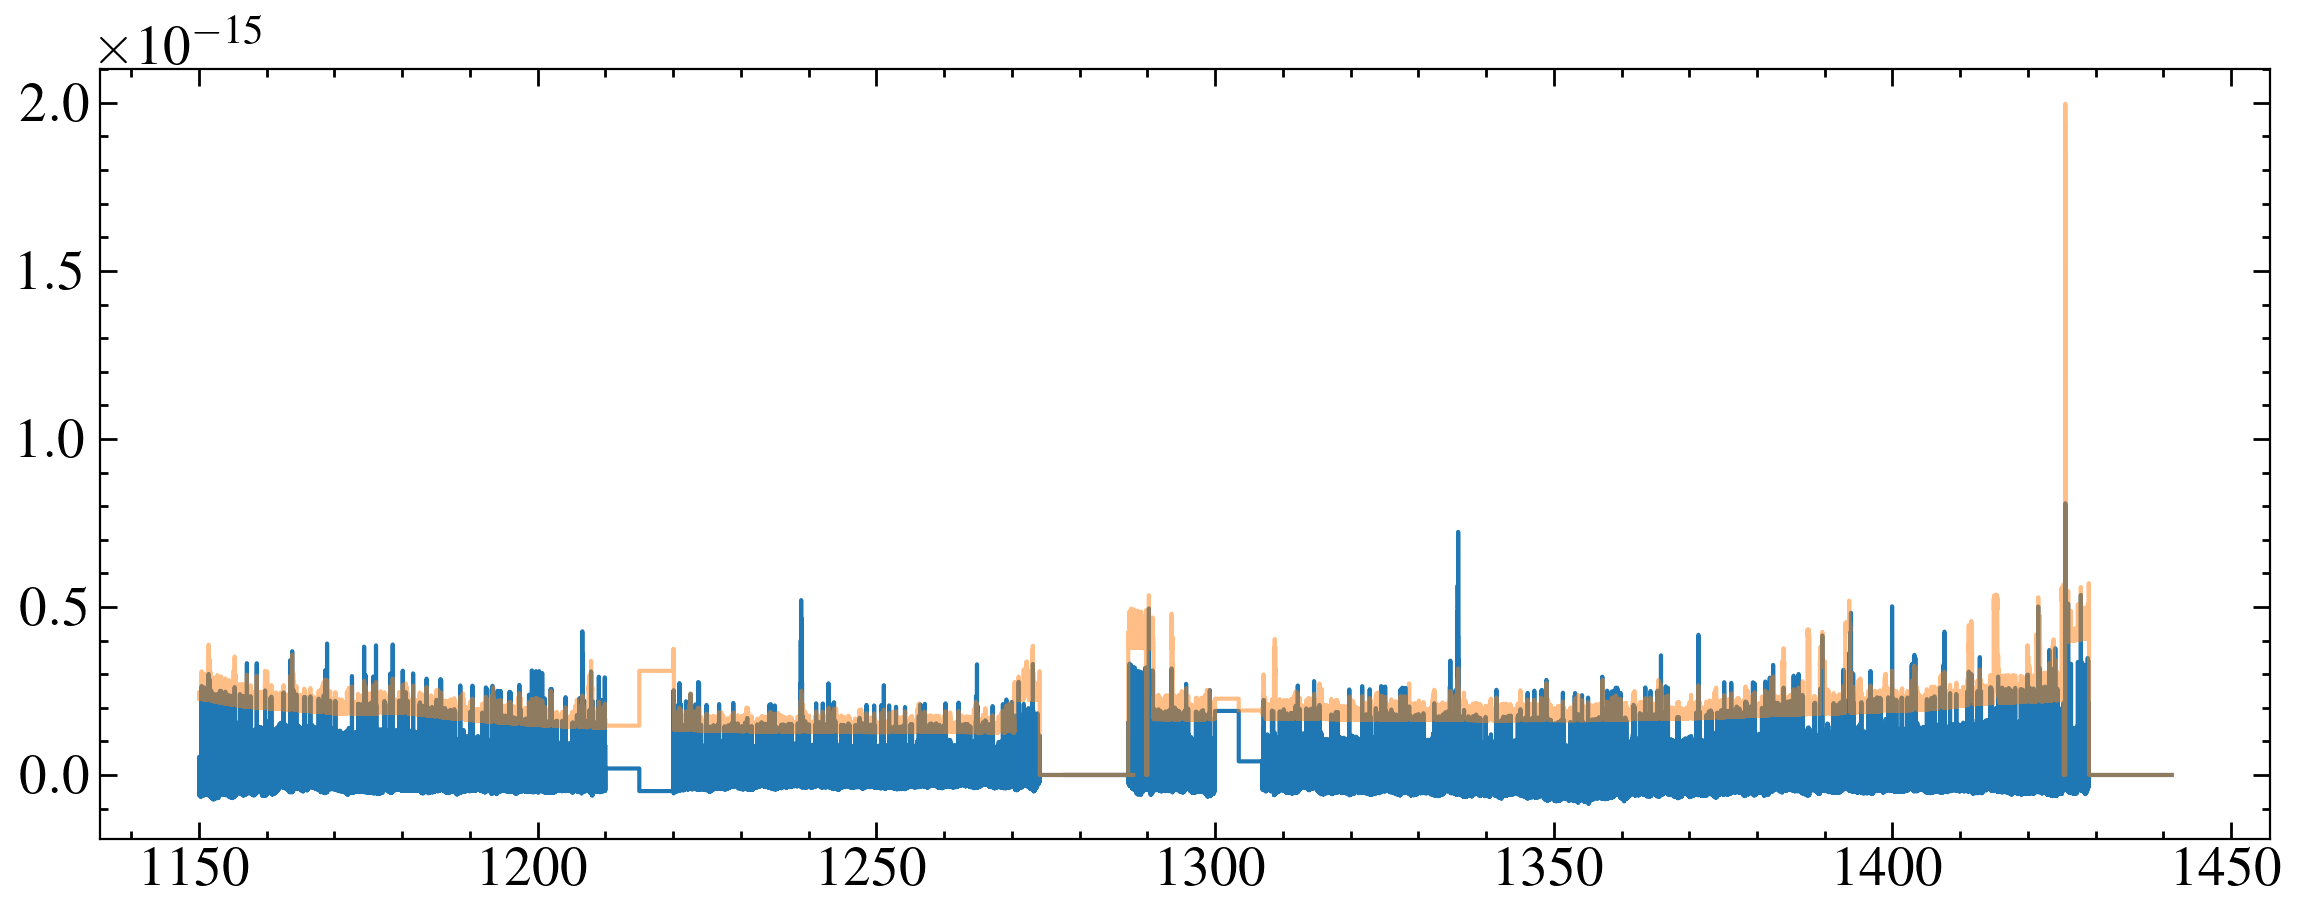

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm05010_x1dsum.fits
G130M


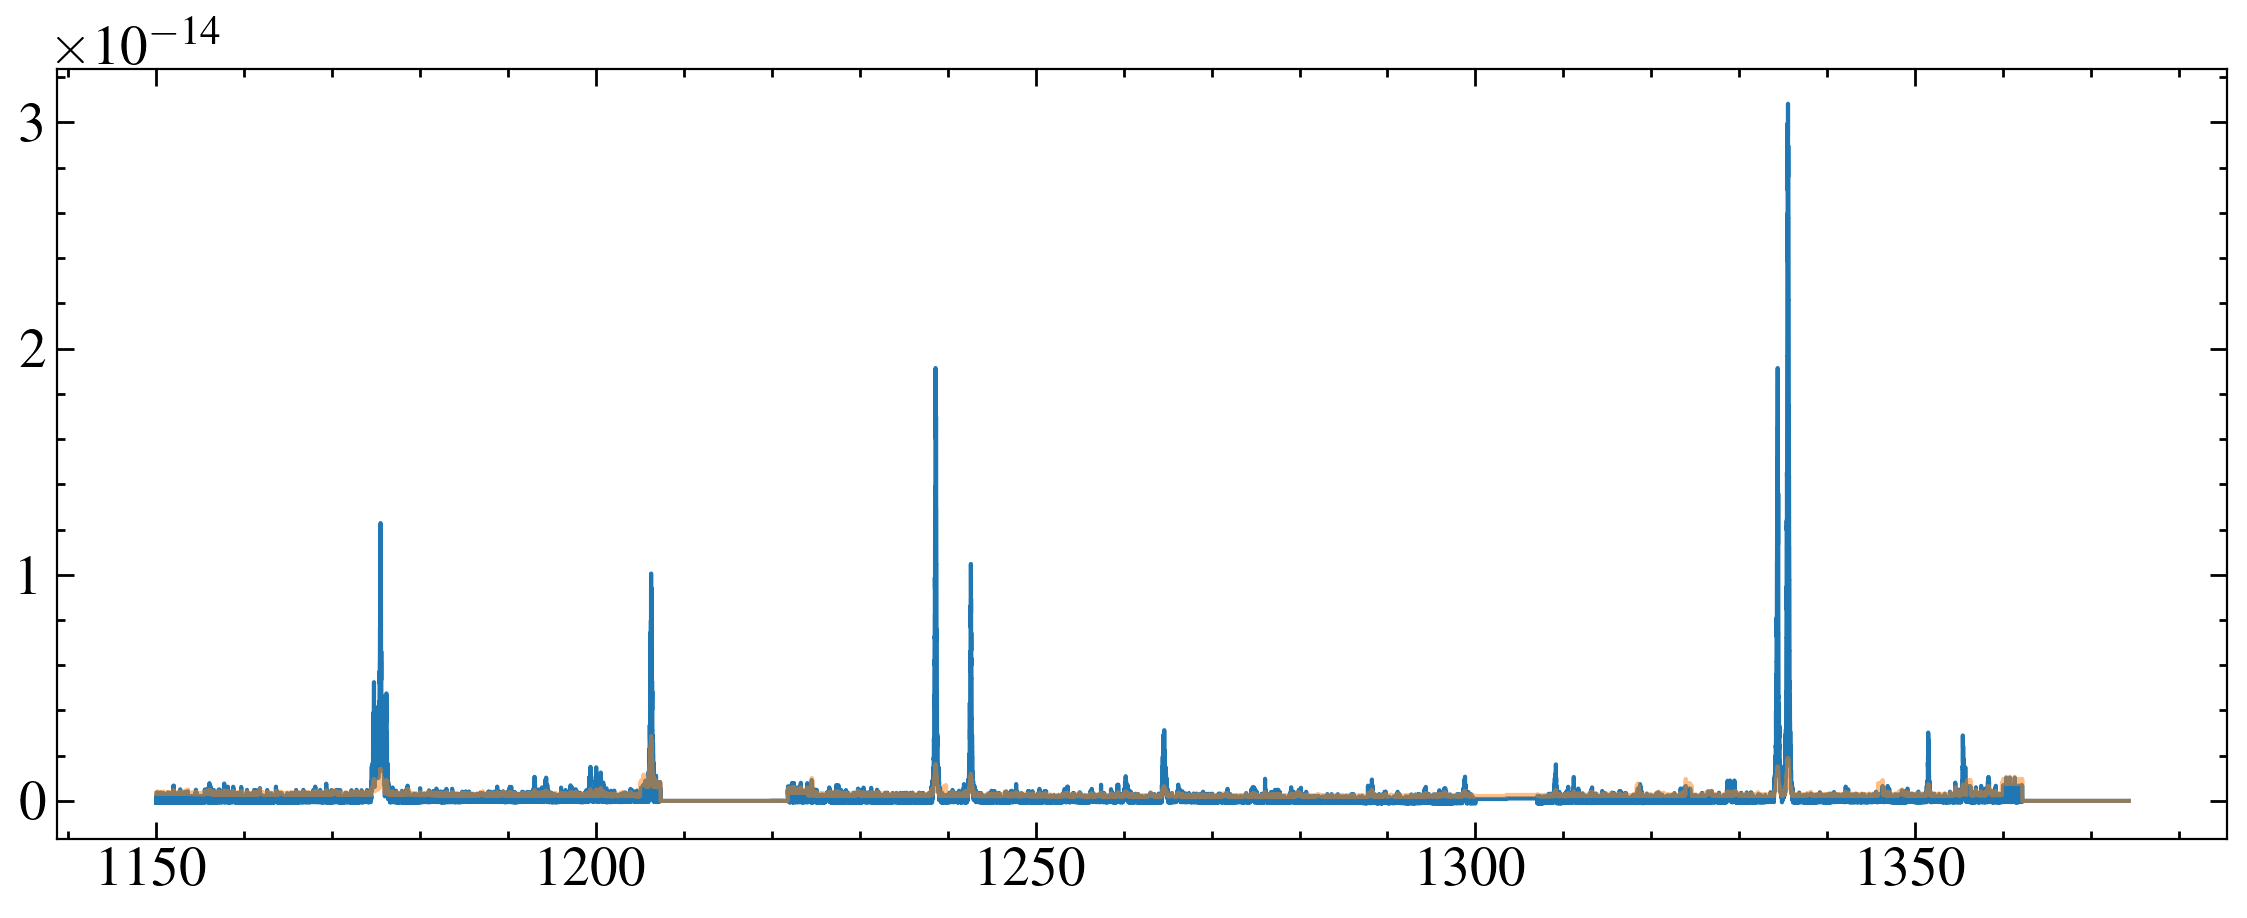

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm11010_x1dsum.fits
G130M


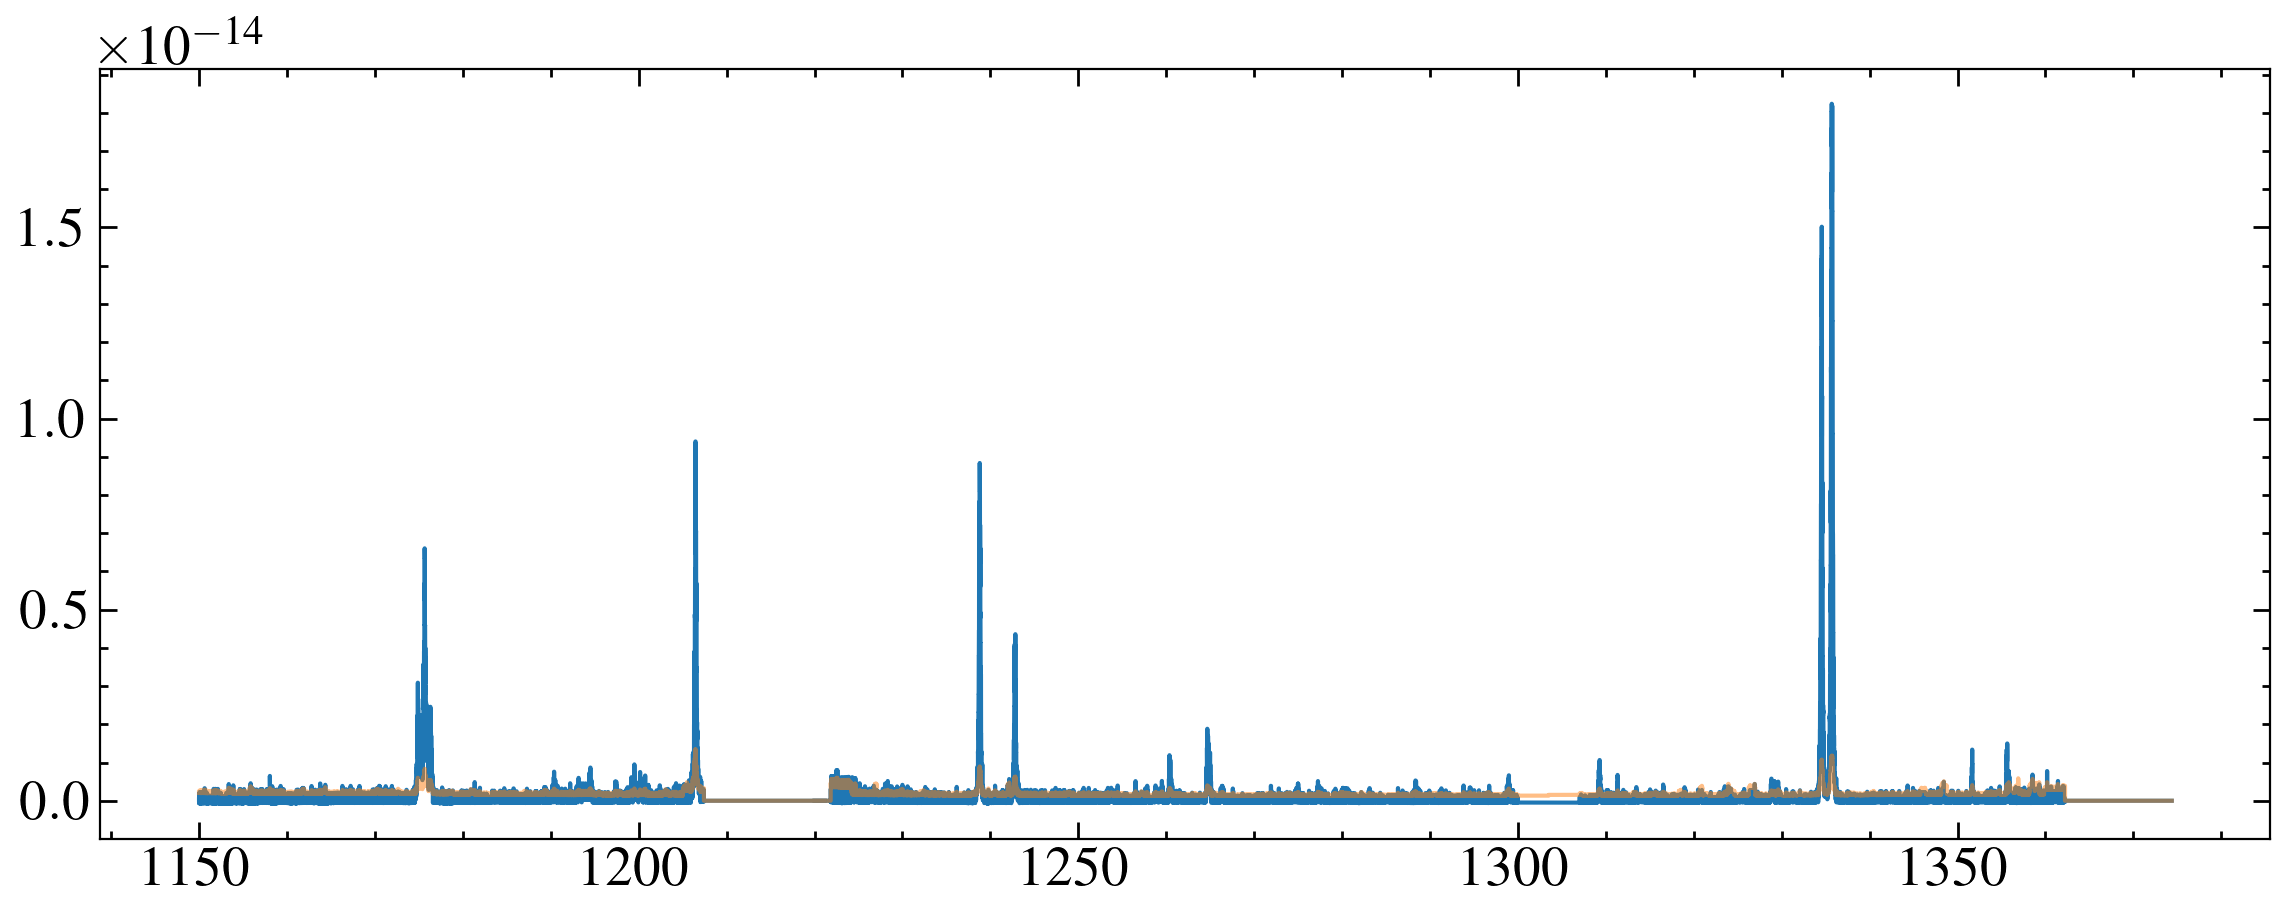

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm13010_x1dsum.fits
G160M


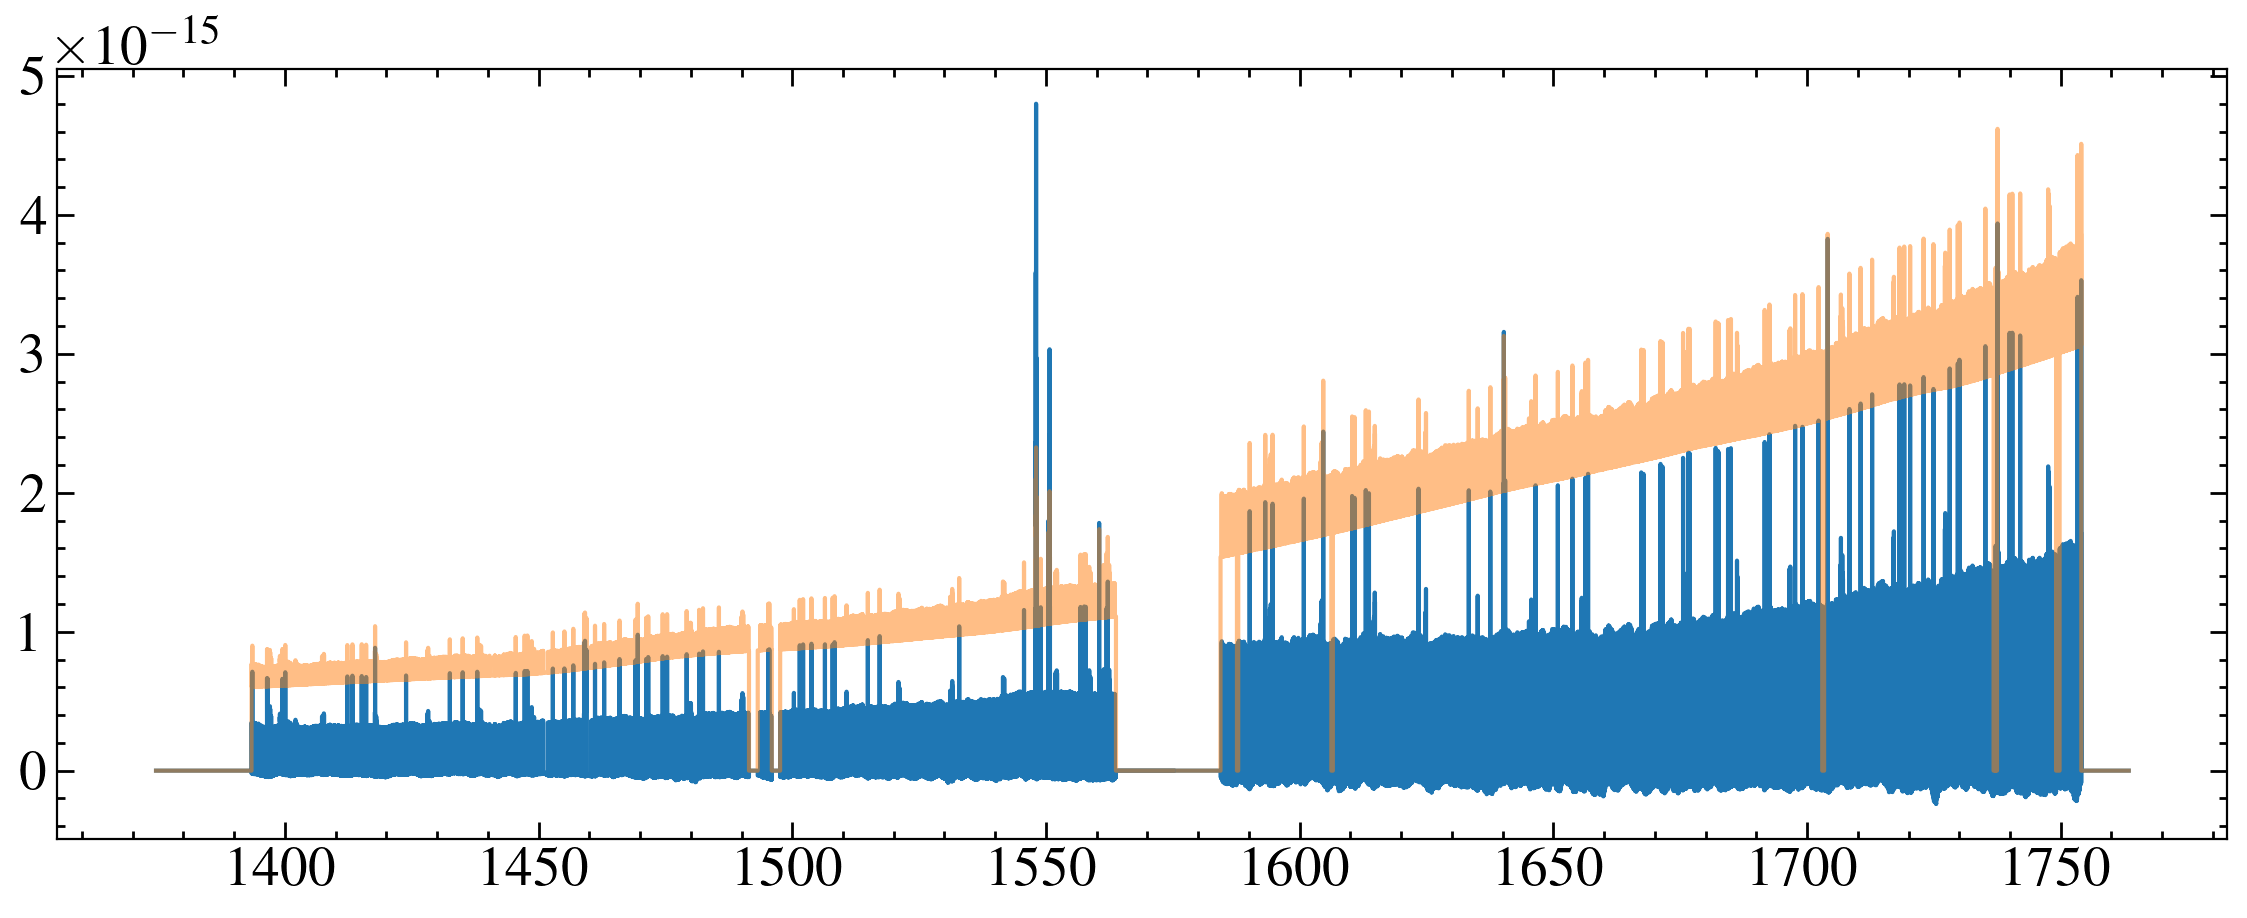

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm13020_x1dsum.fits
G160M


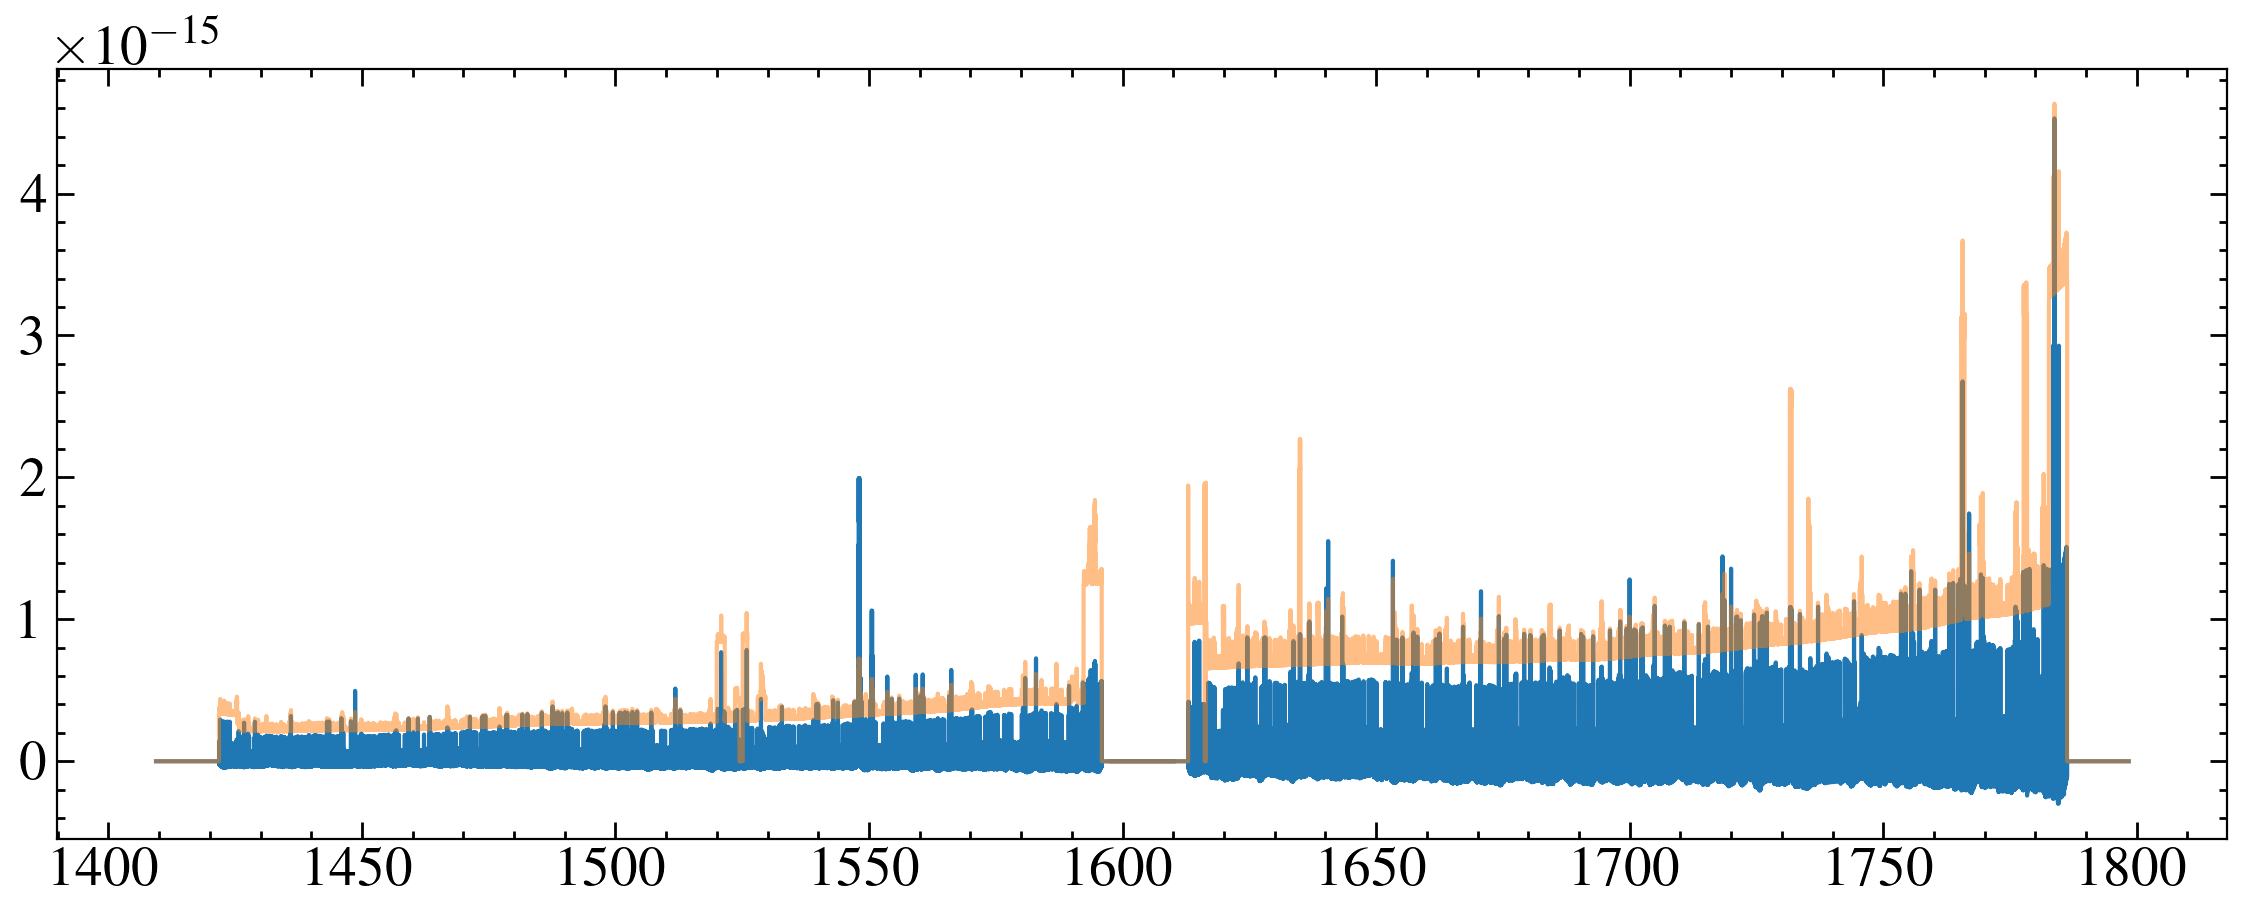

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm13030_x1dsum.fits
G230L


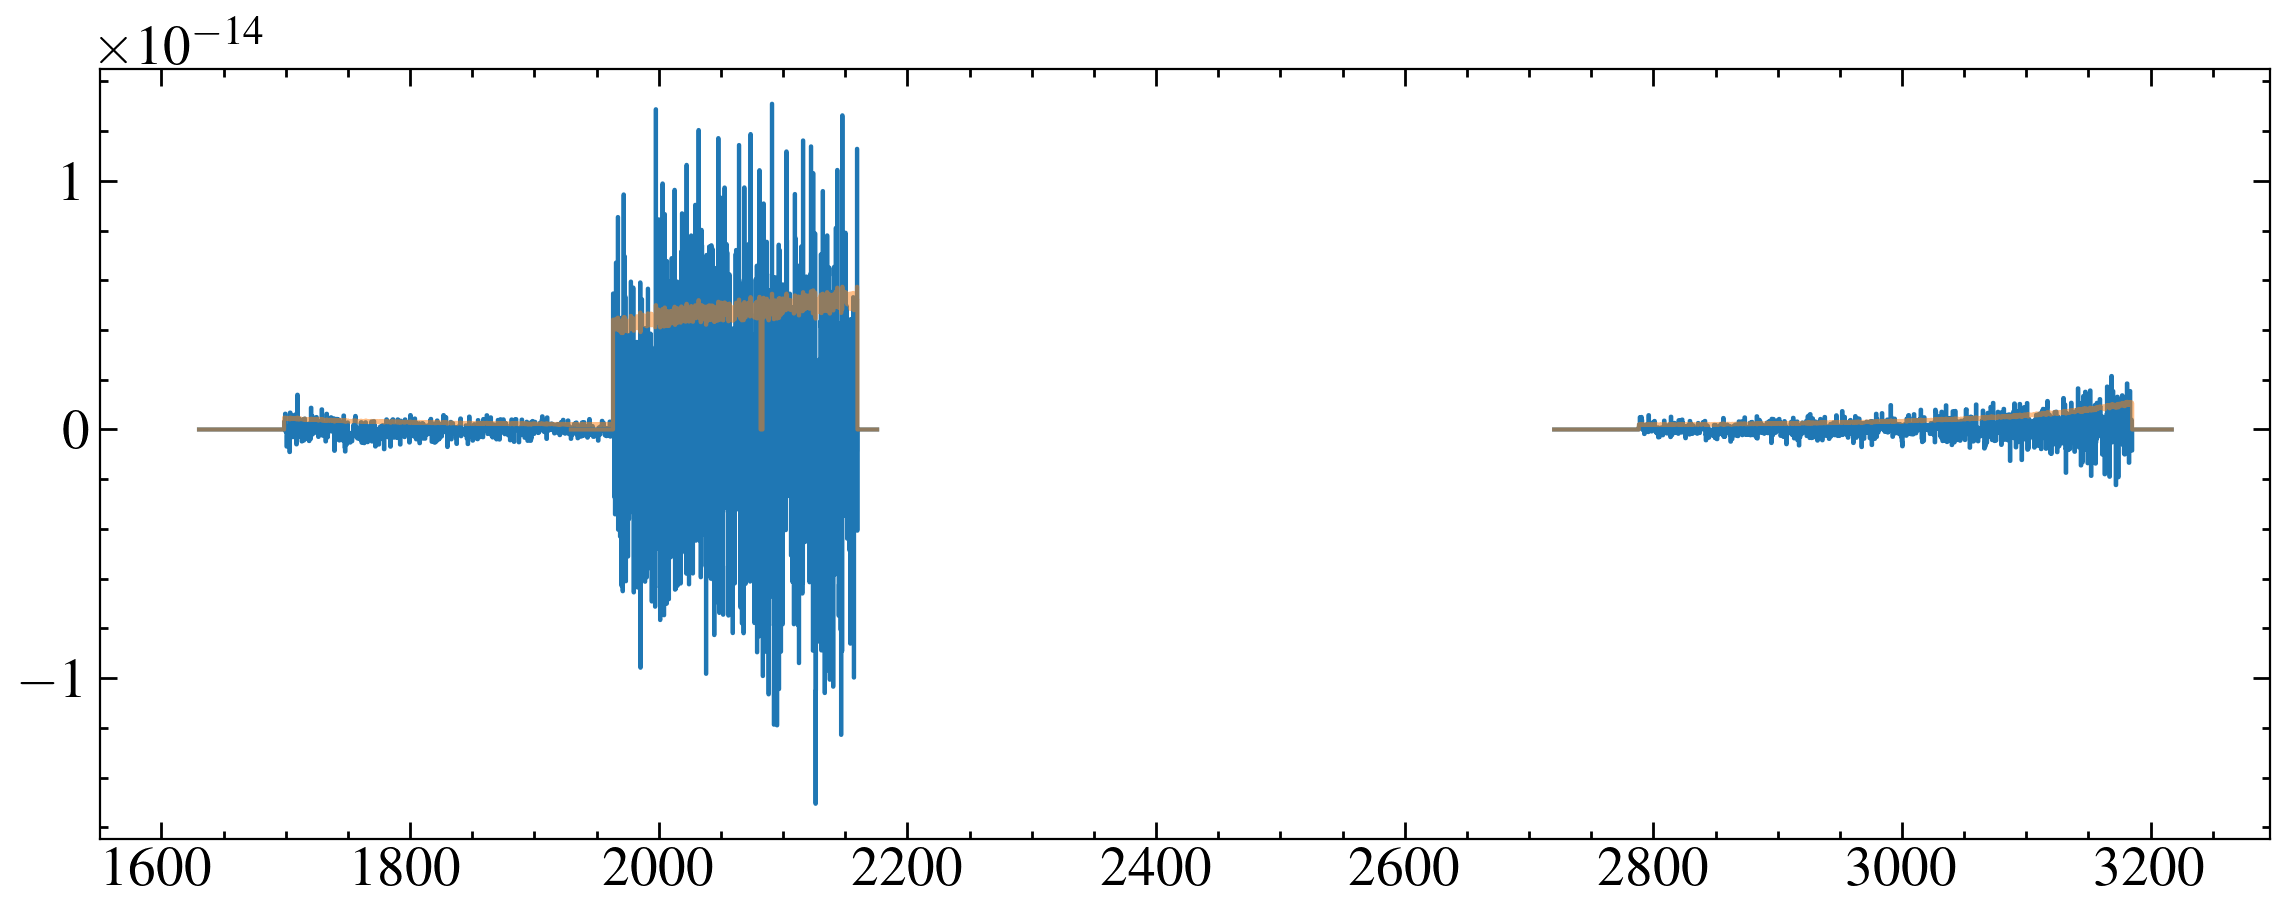

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm14010_x1dsum.fits
G130M


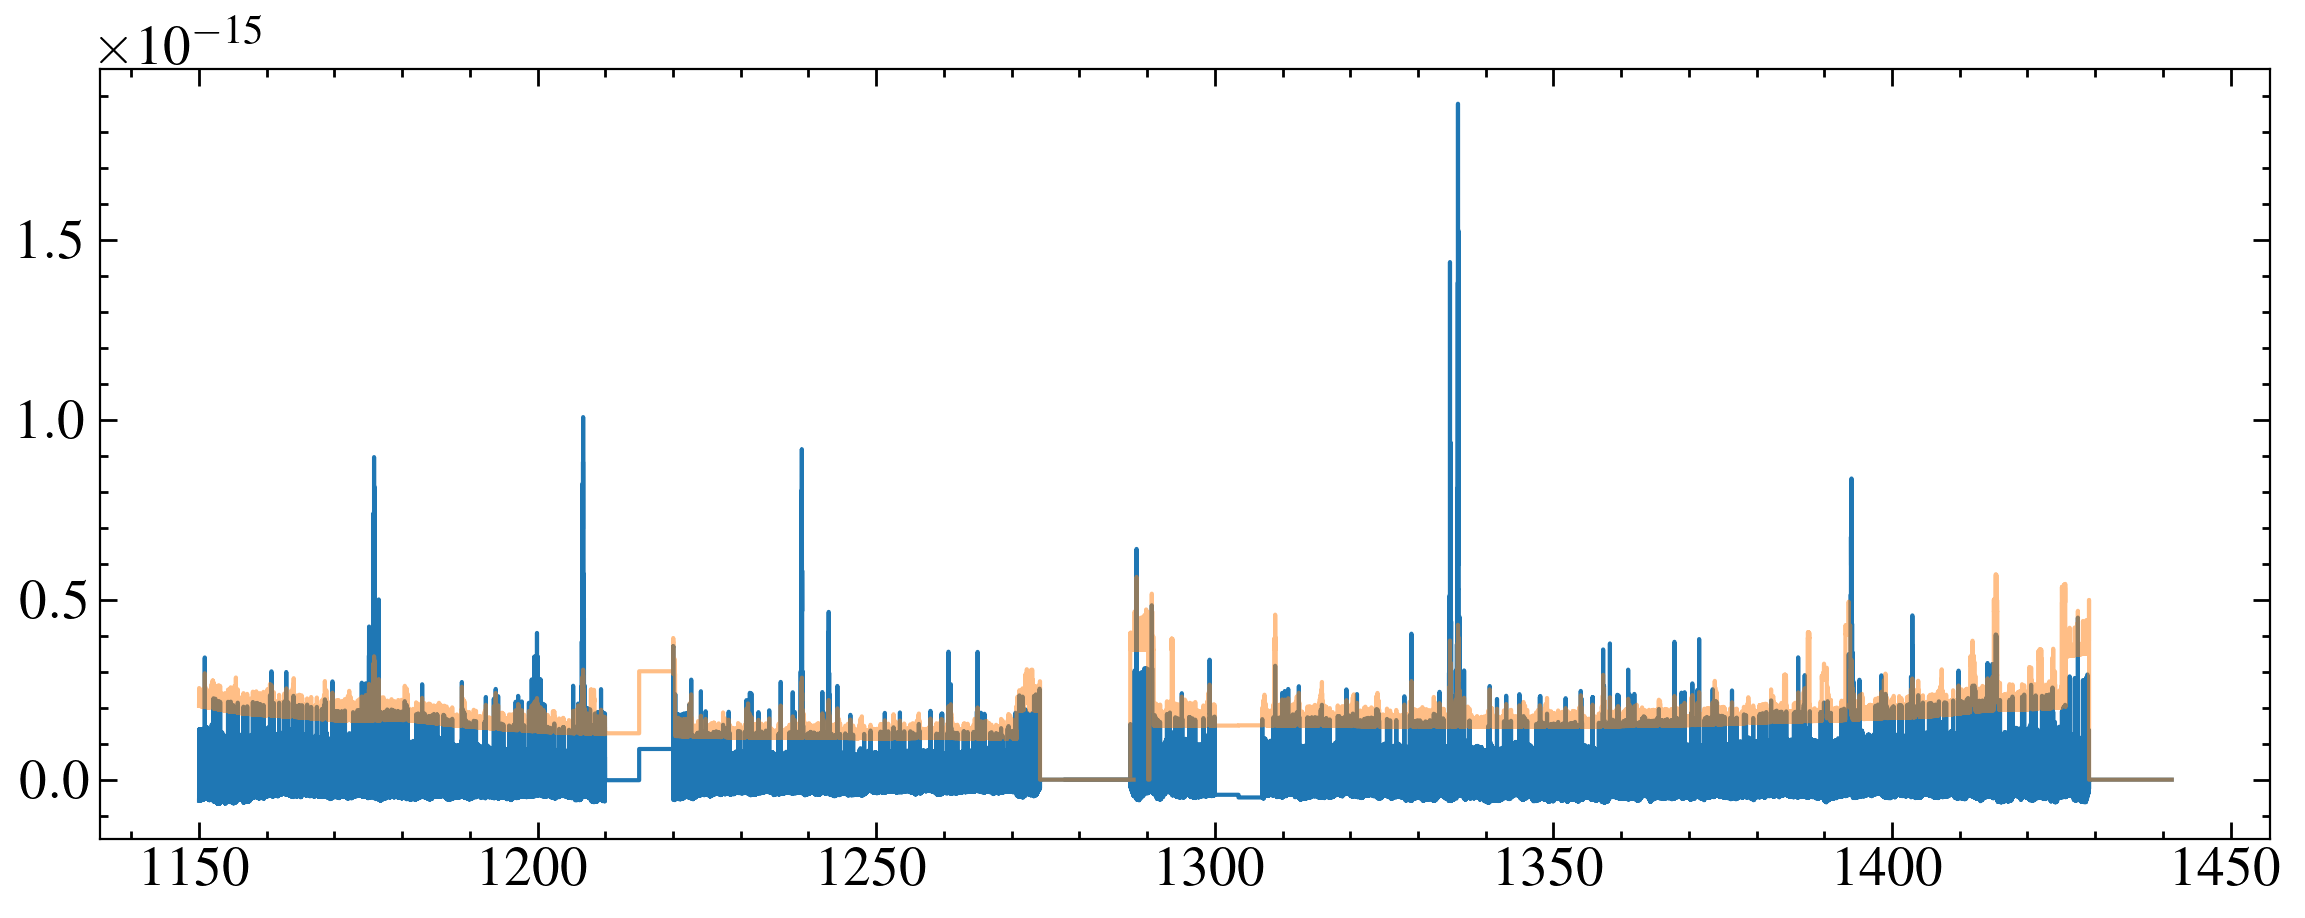

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm16010_x1dsum.fits
G230L


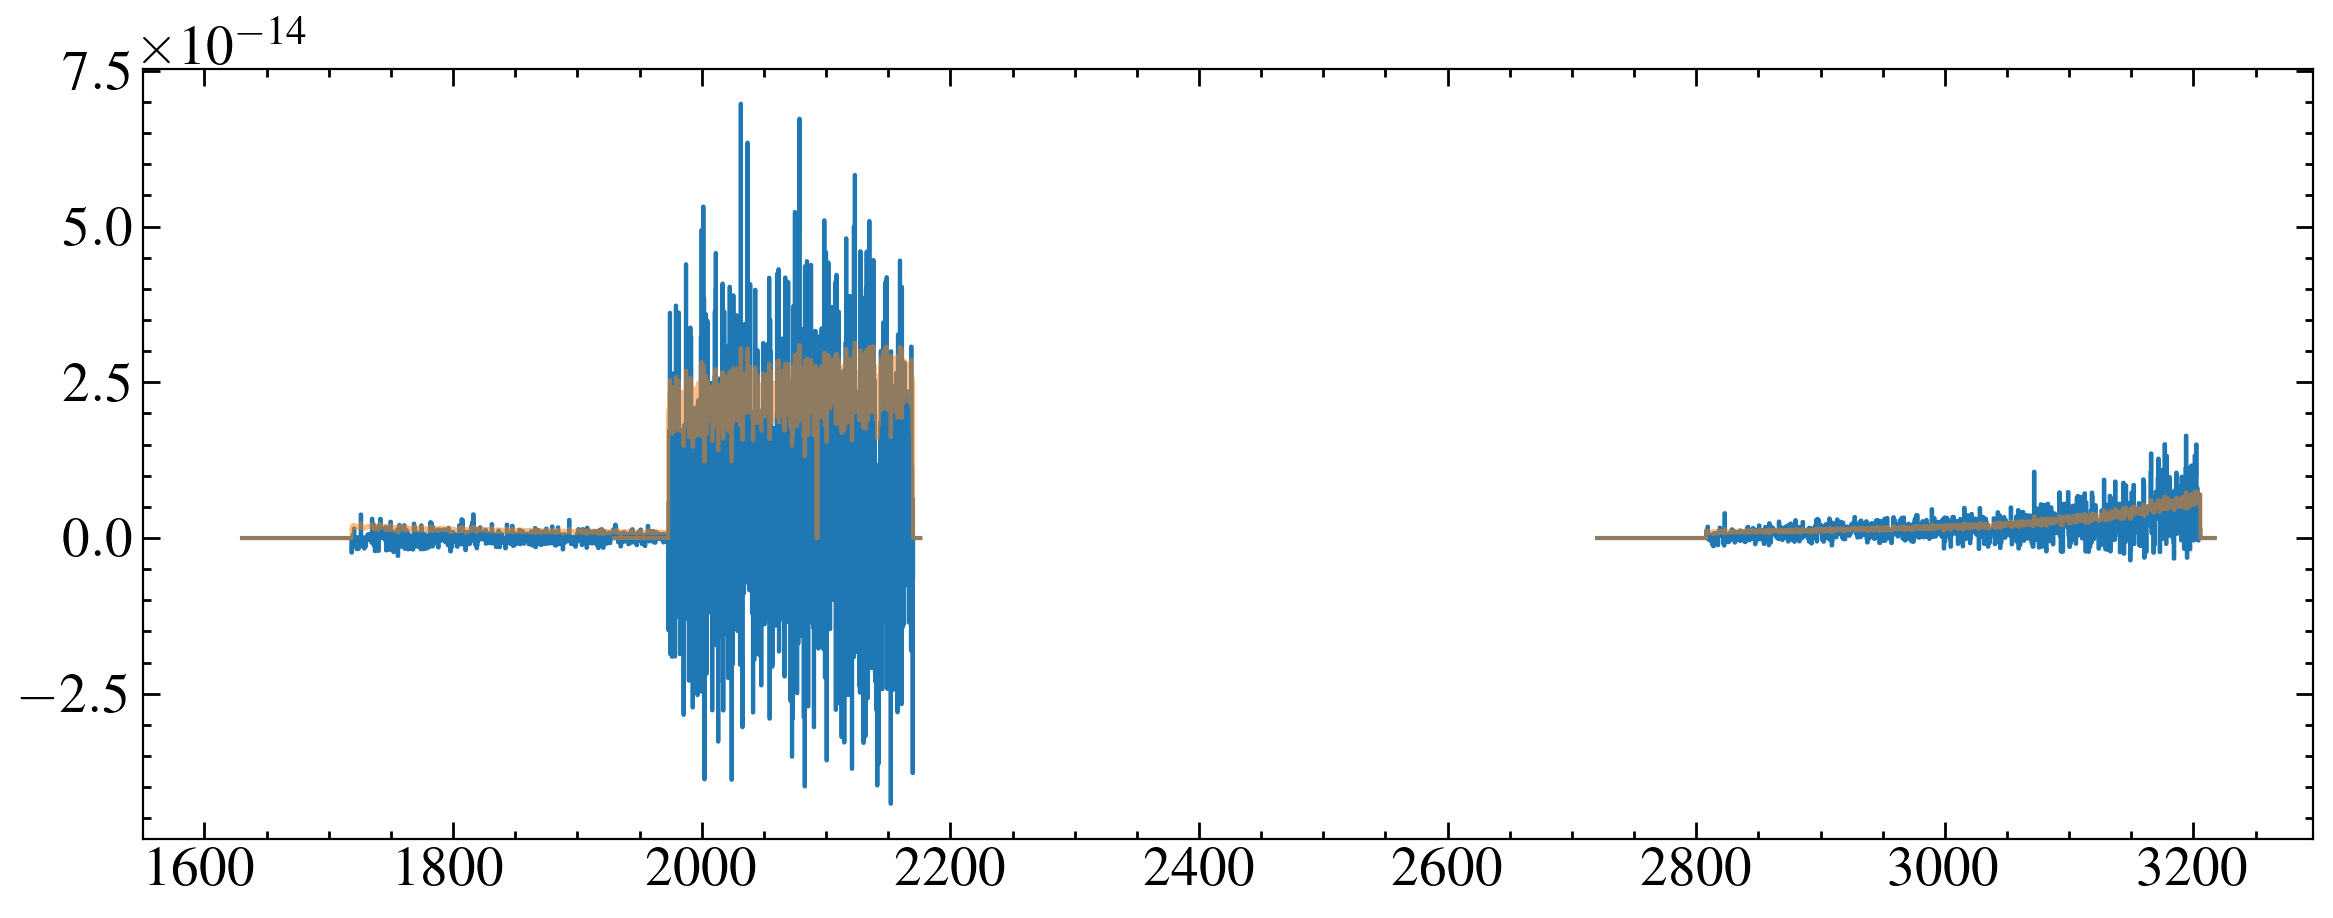

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm16020_x1dsum.fits
G160M


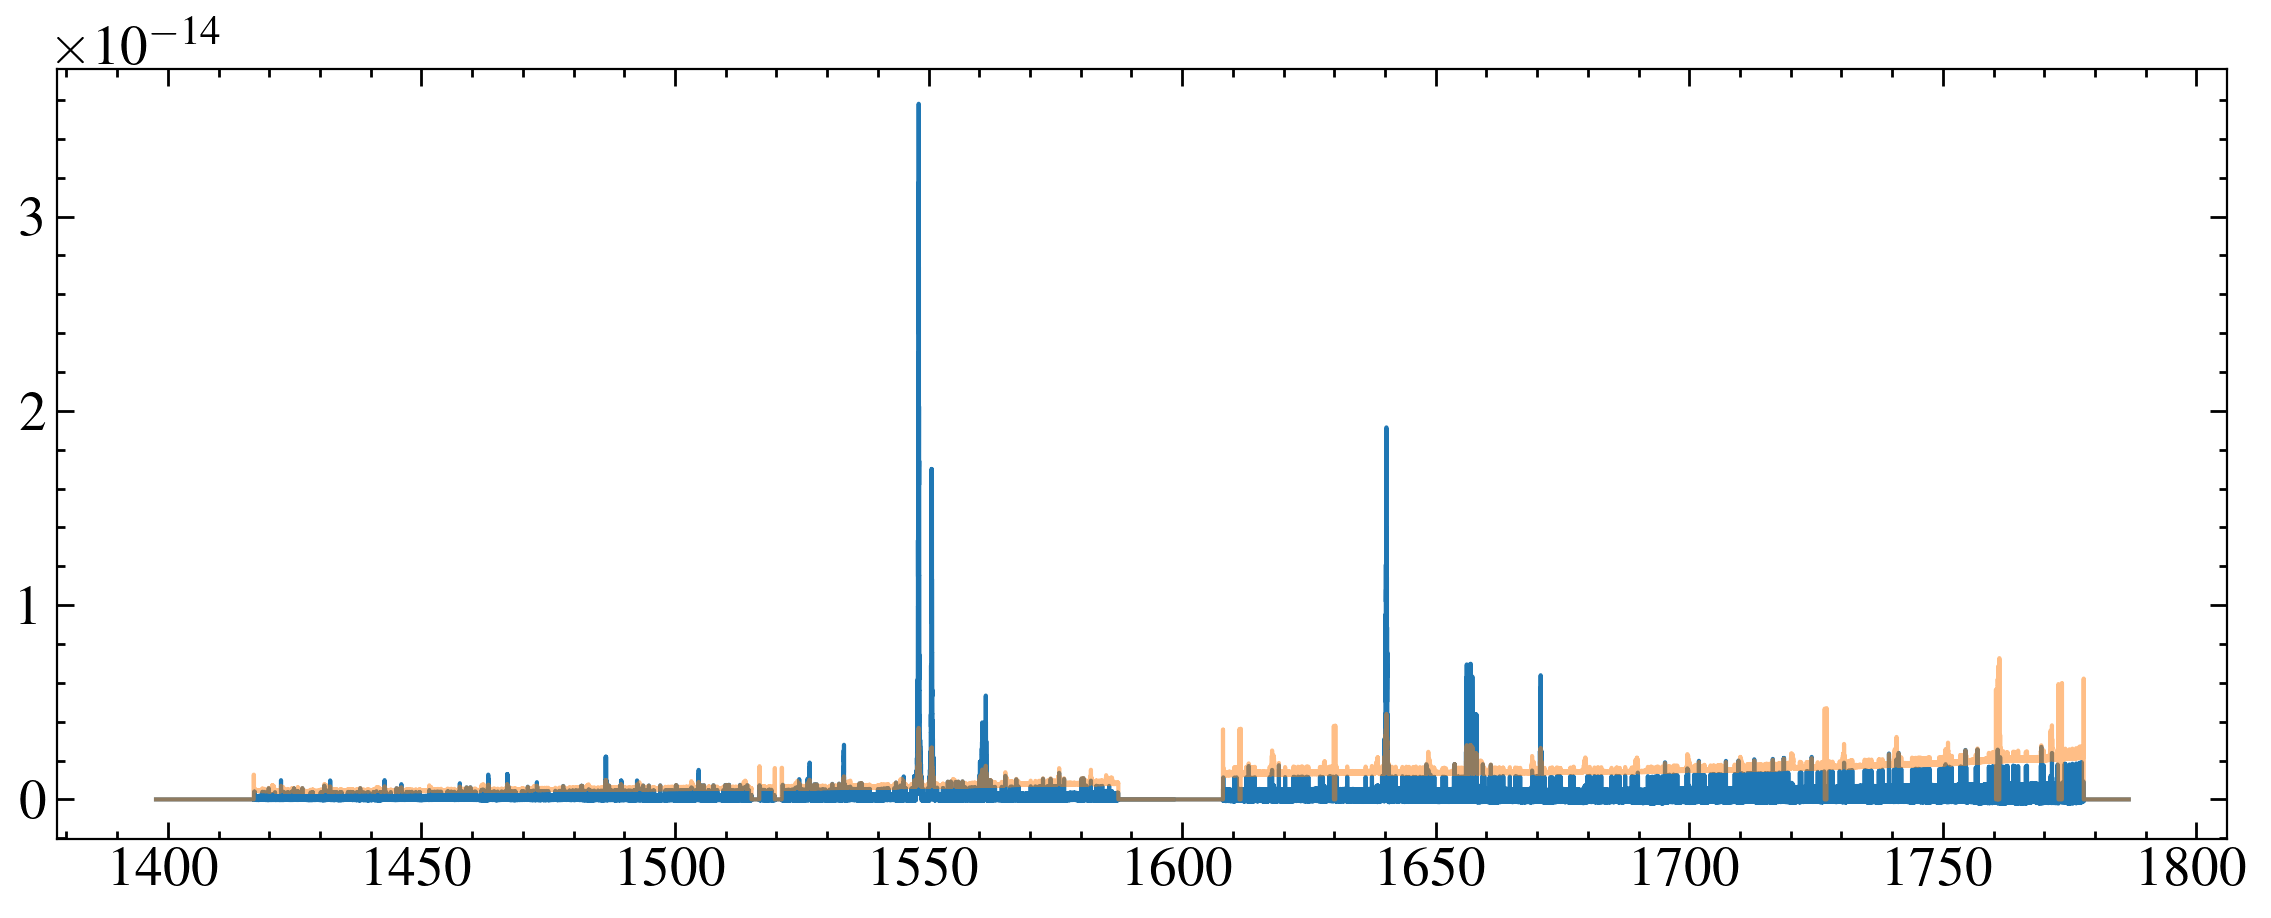

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm16030_x1dsum.fits
G160M


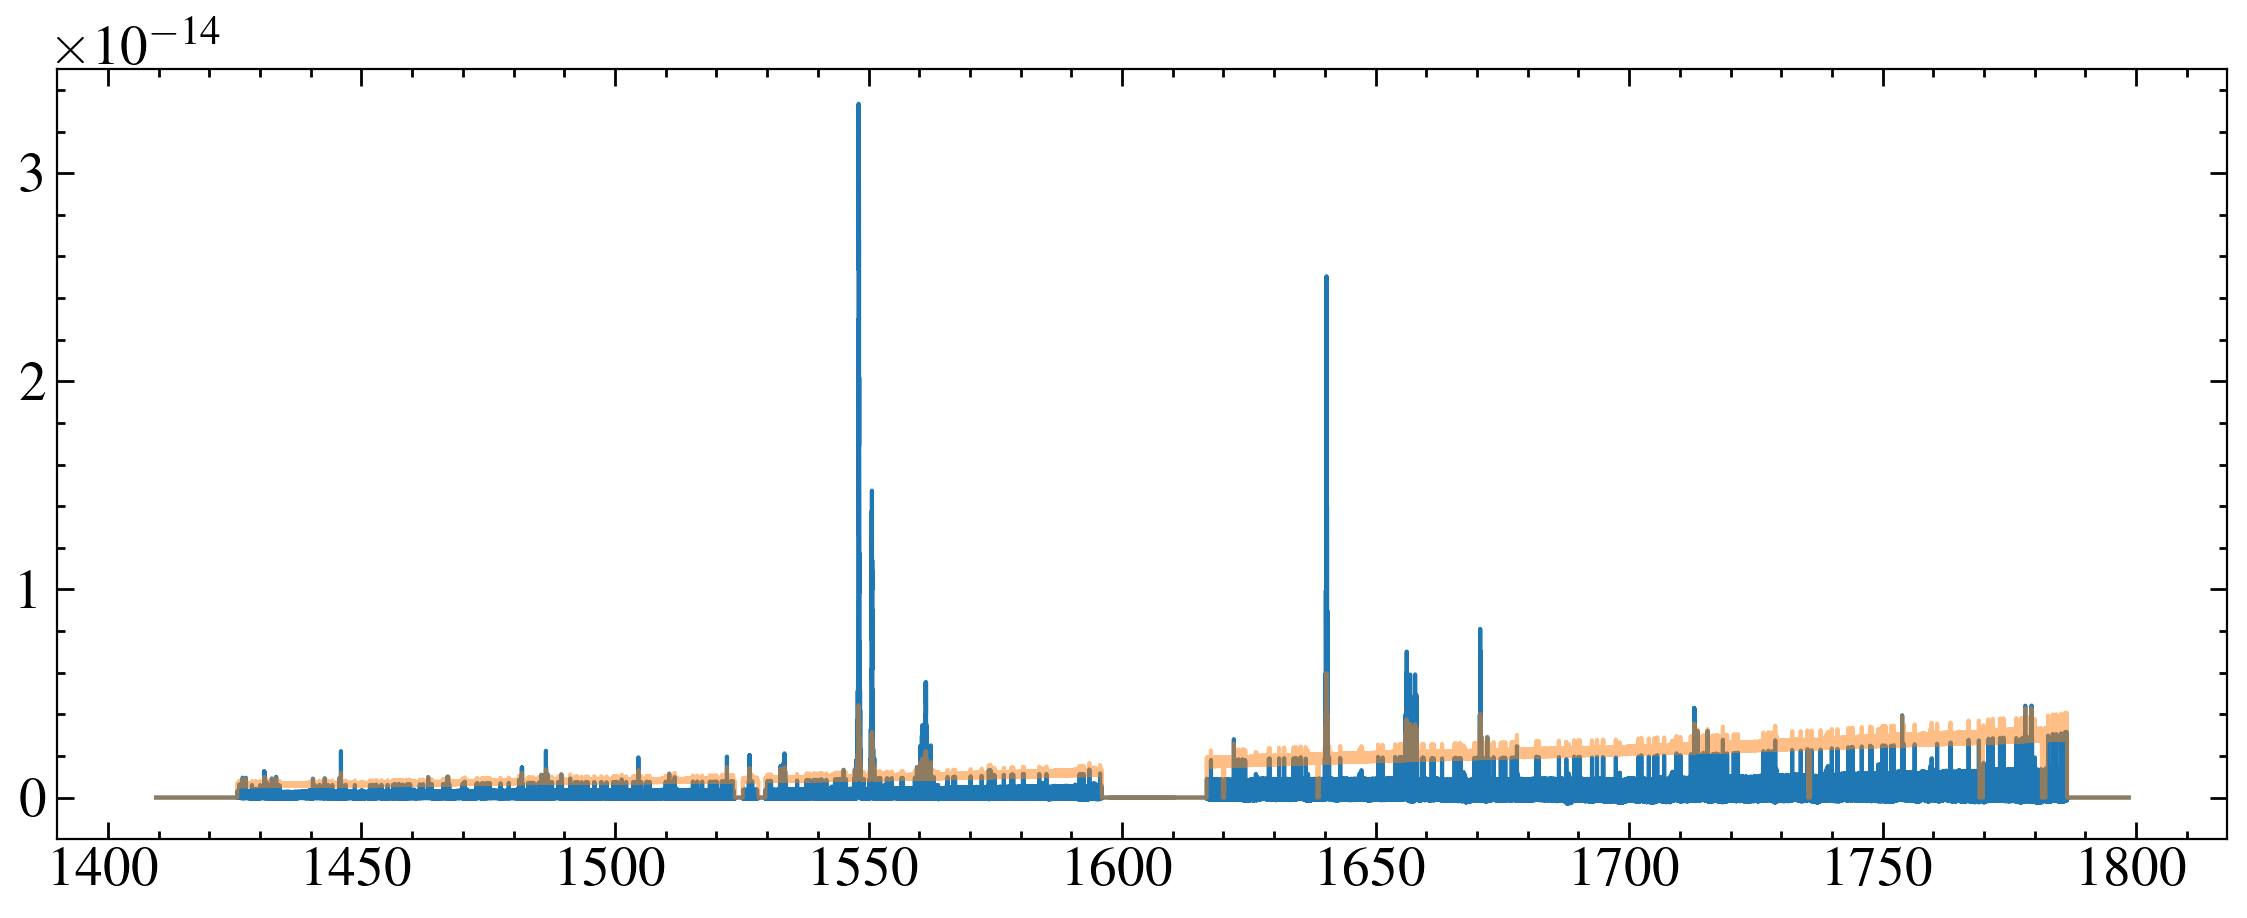

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm17010_x1dsum.fits
G130M


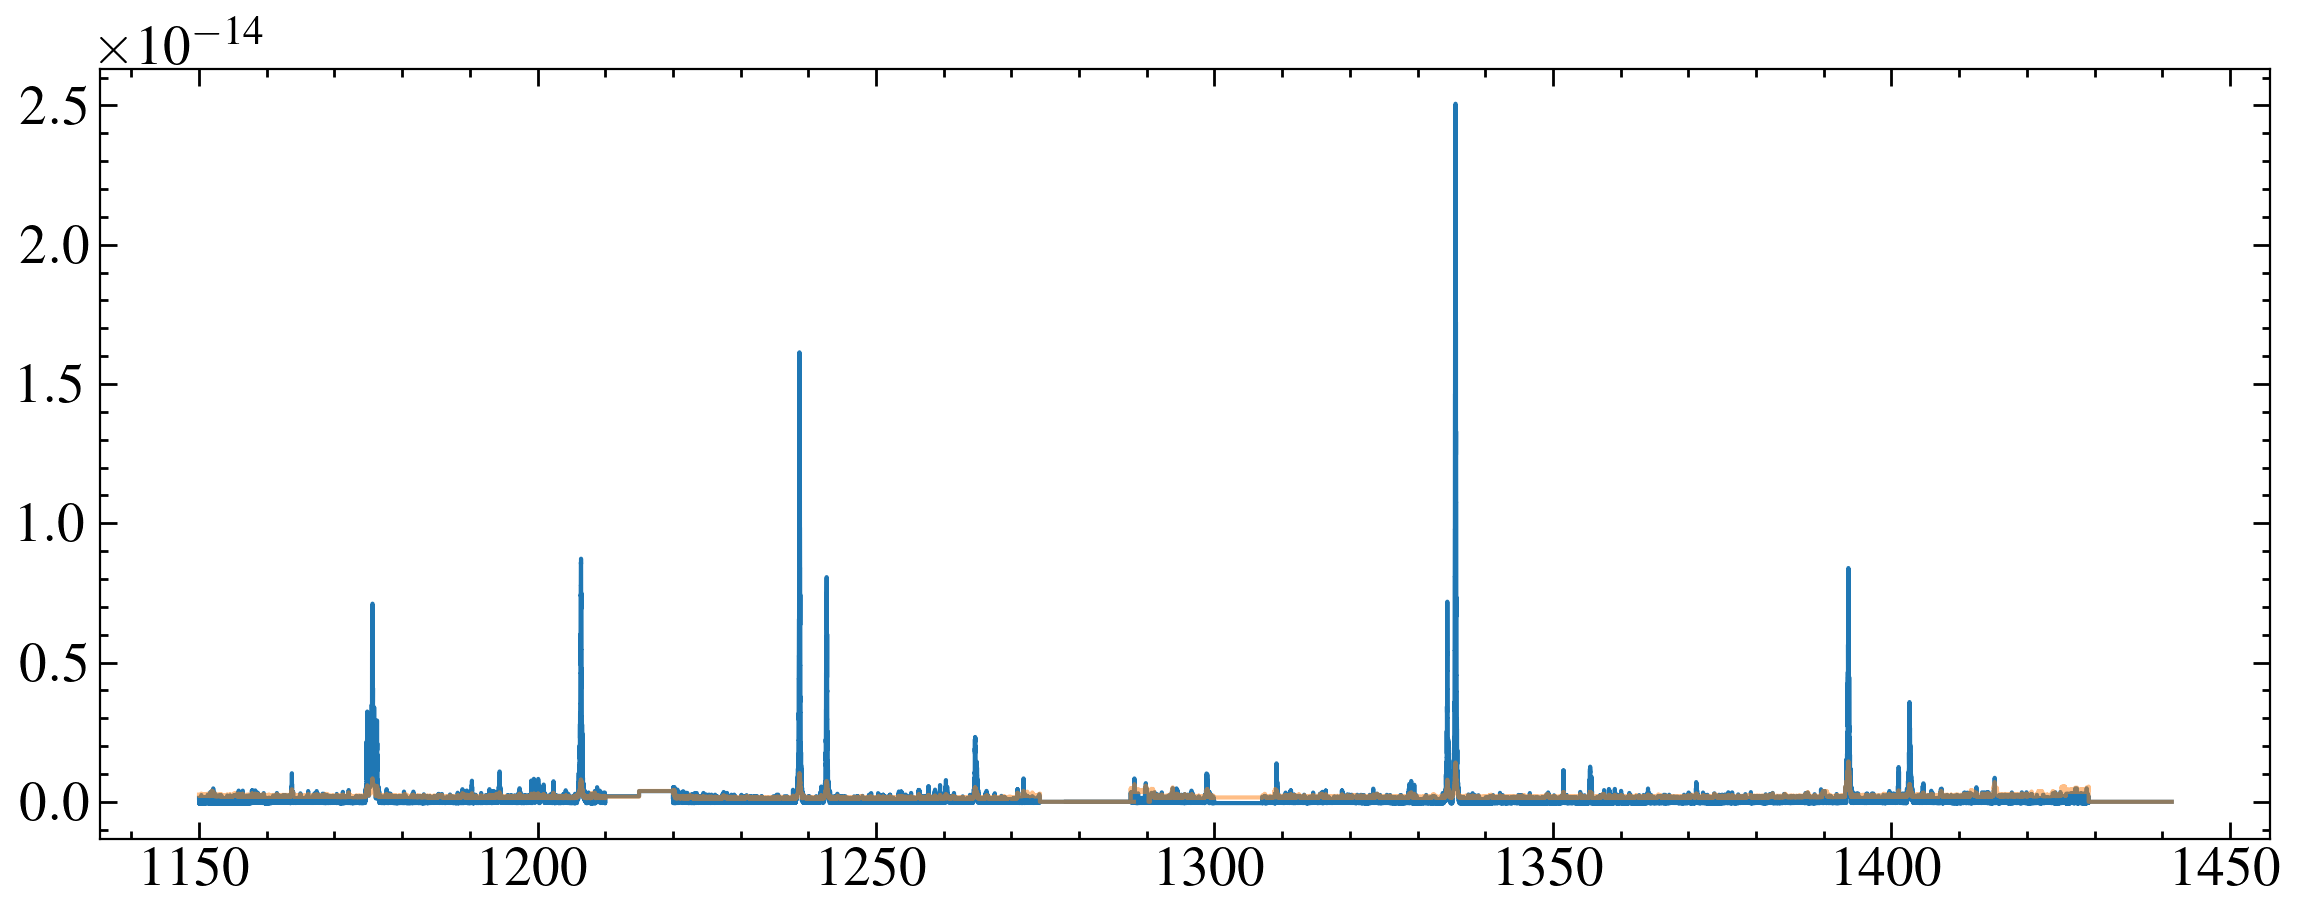

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm20010_x1dsum.fits
G130M


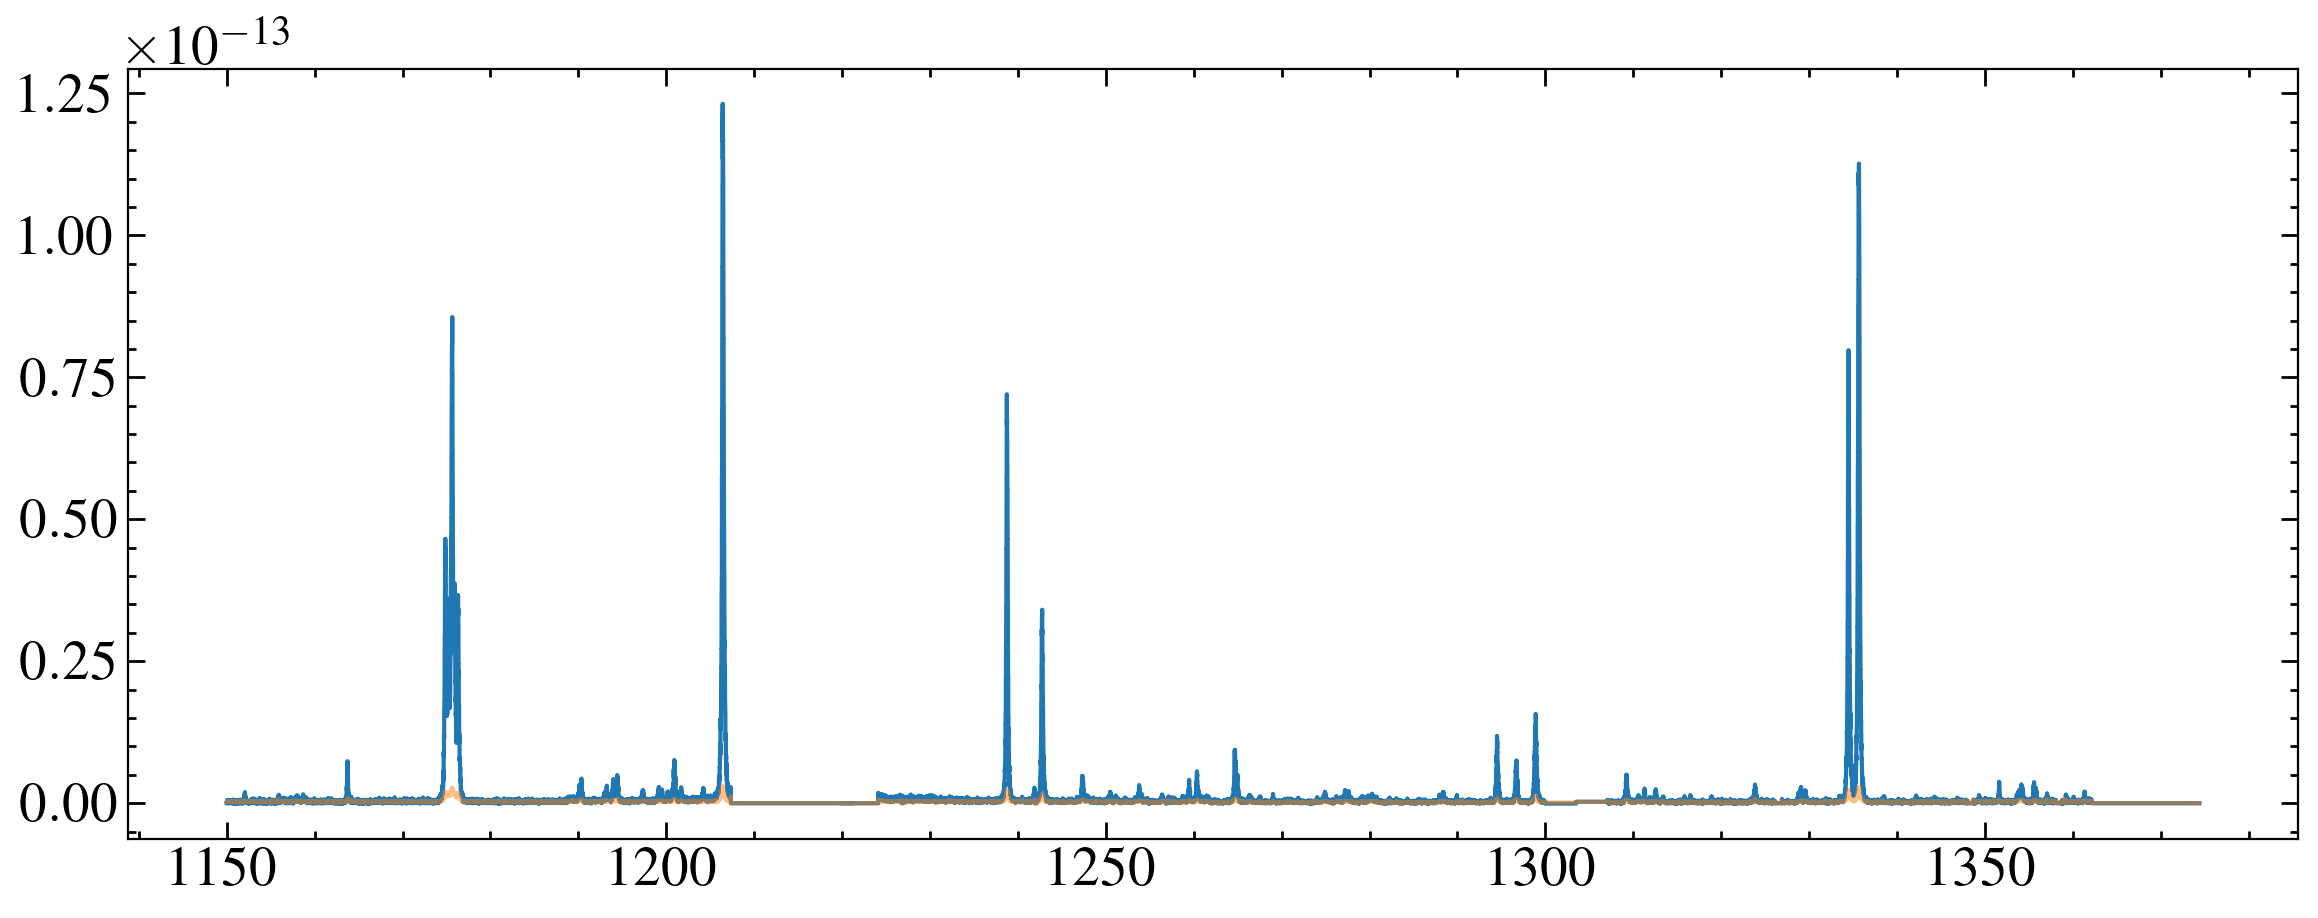

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm23010_x1dsum.fits
G130M


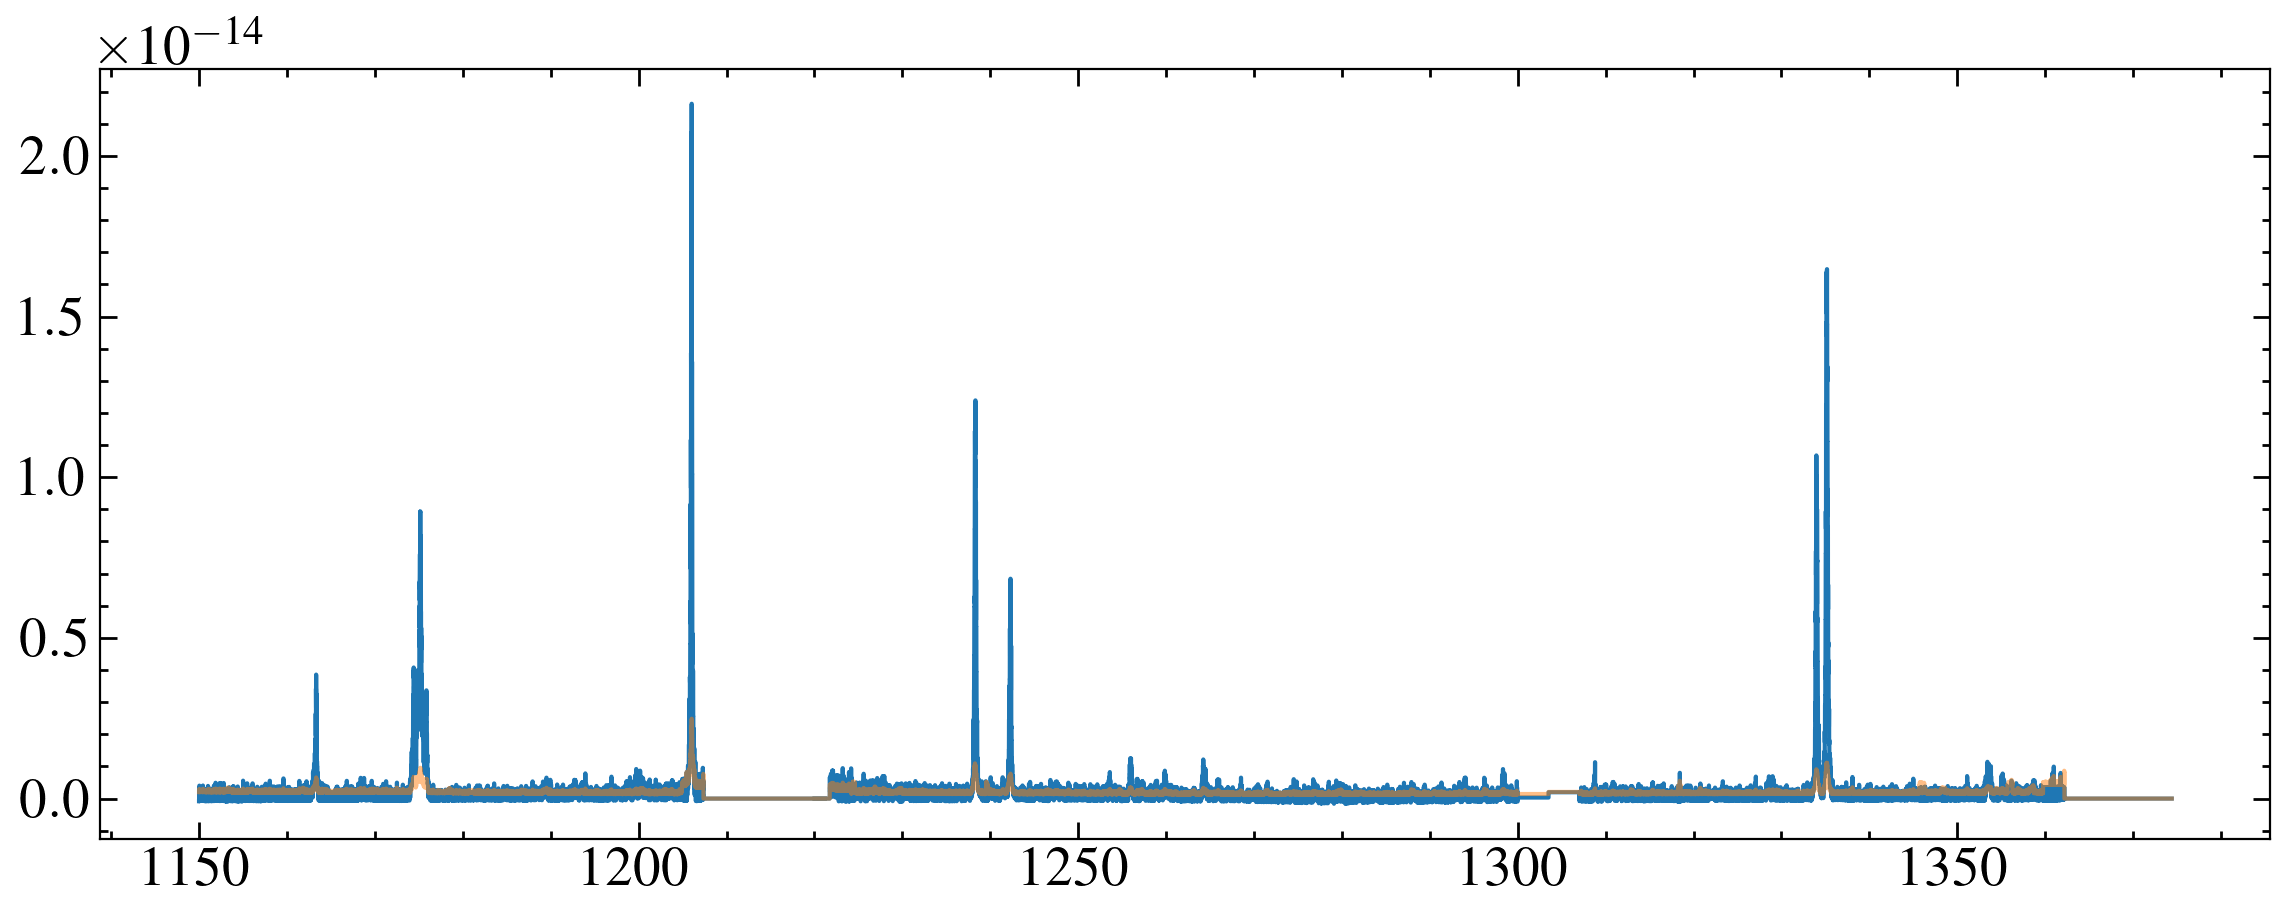

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm25010_x1dsum.fits
G160M


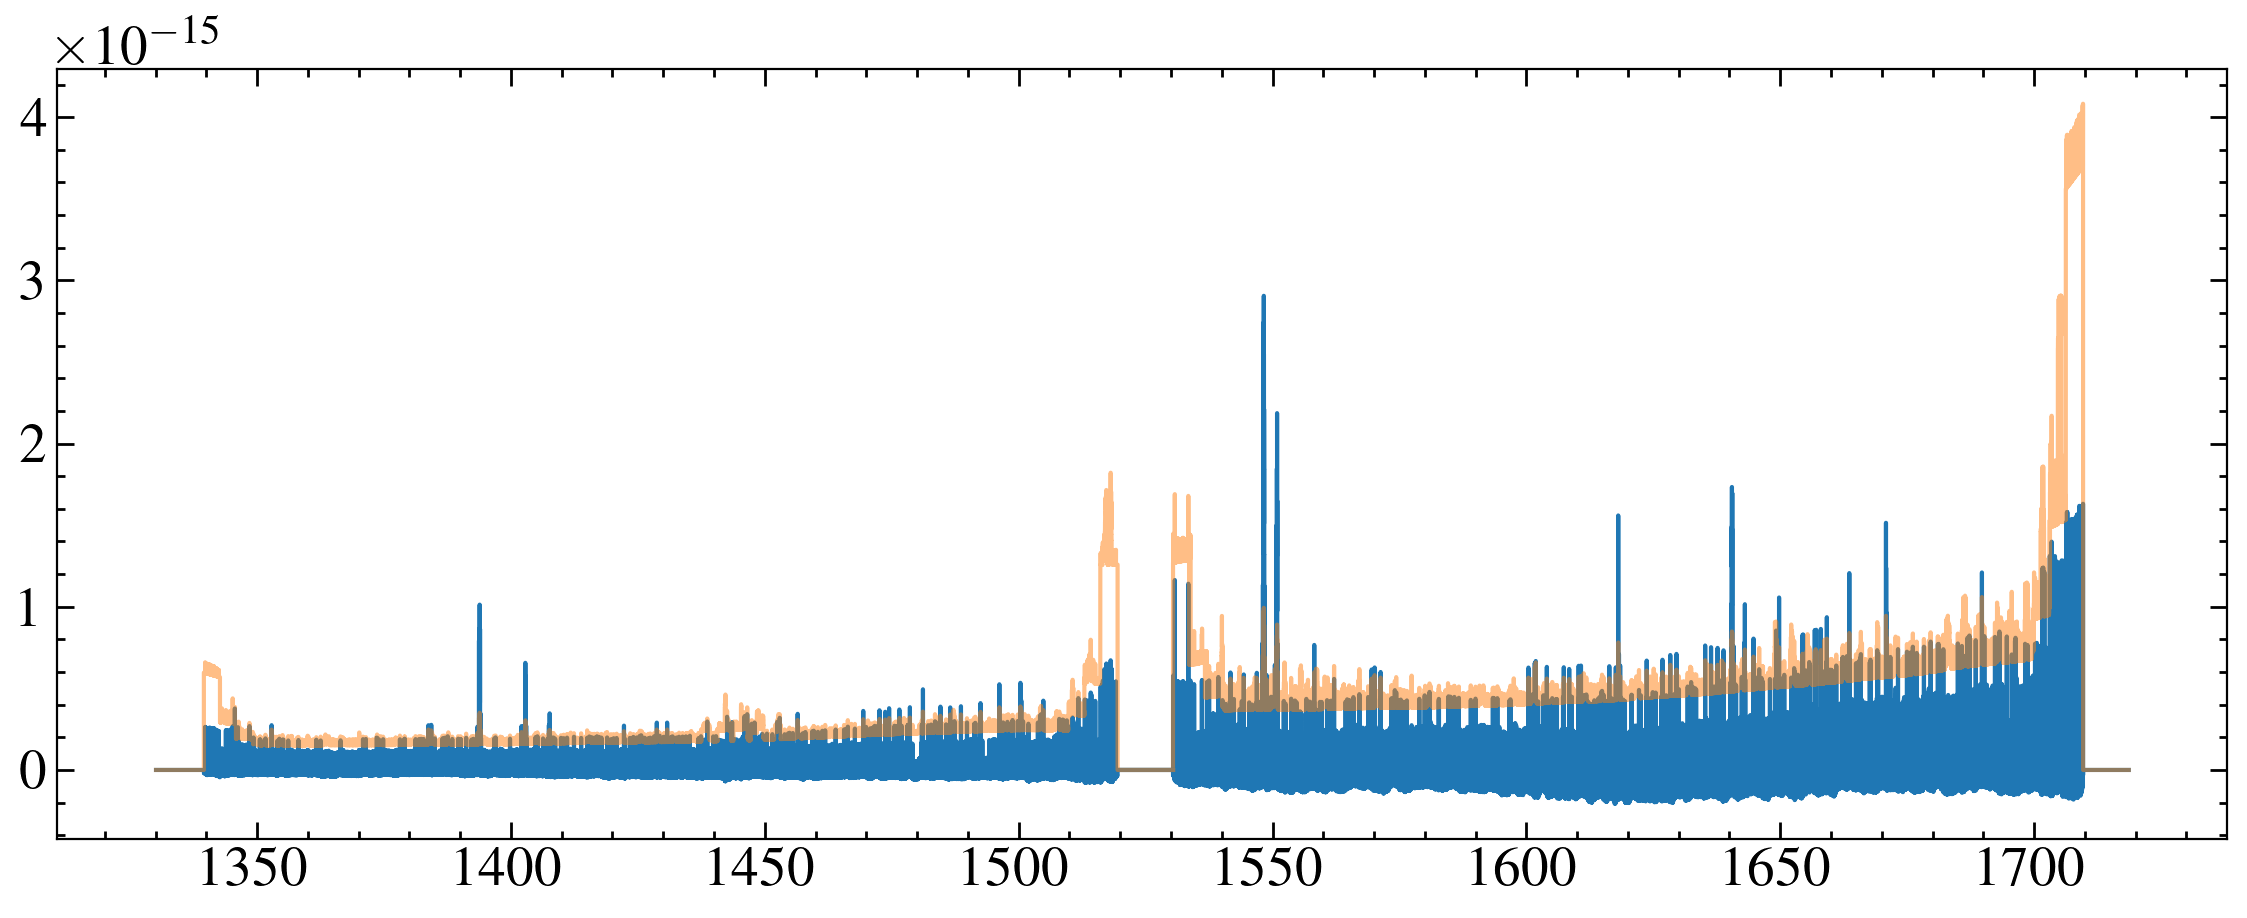

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm25020_x1dsum.fits
G230L


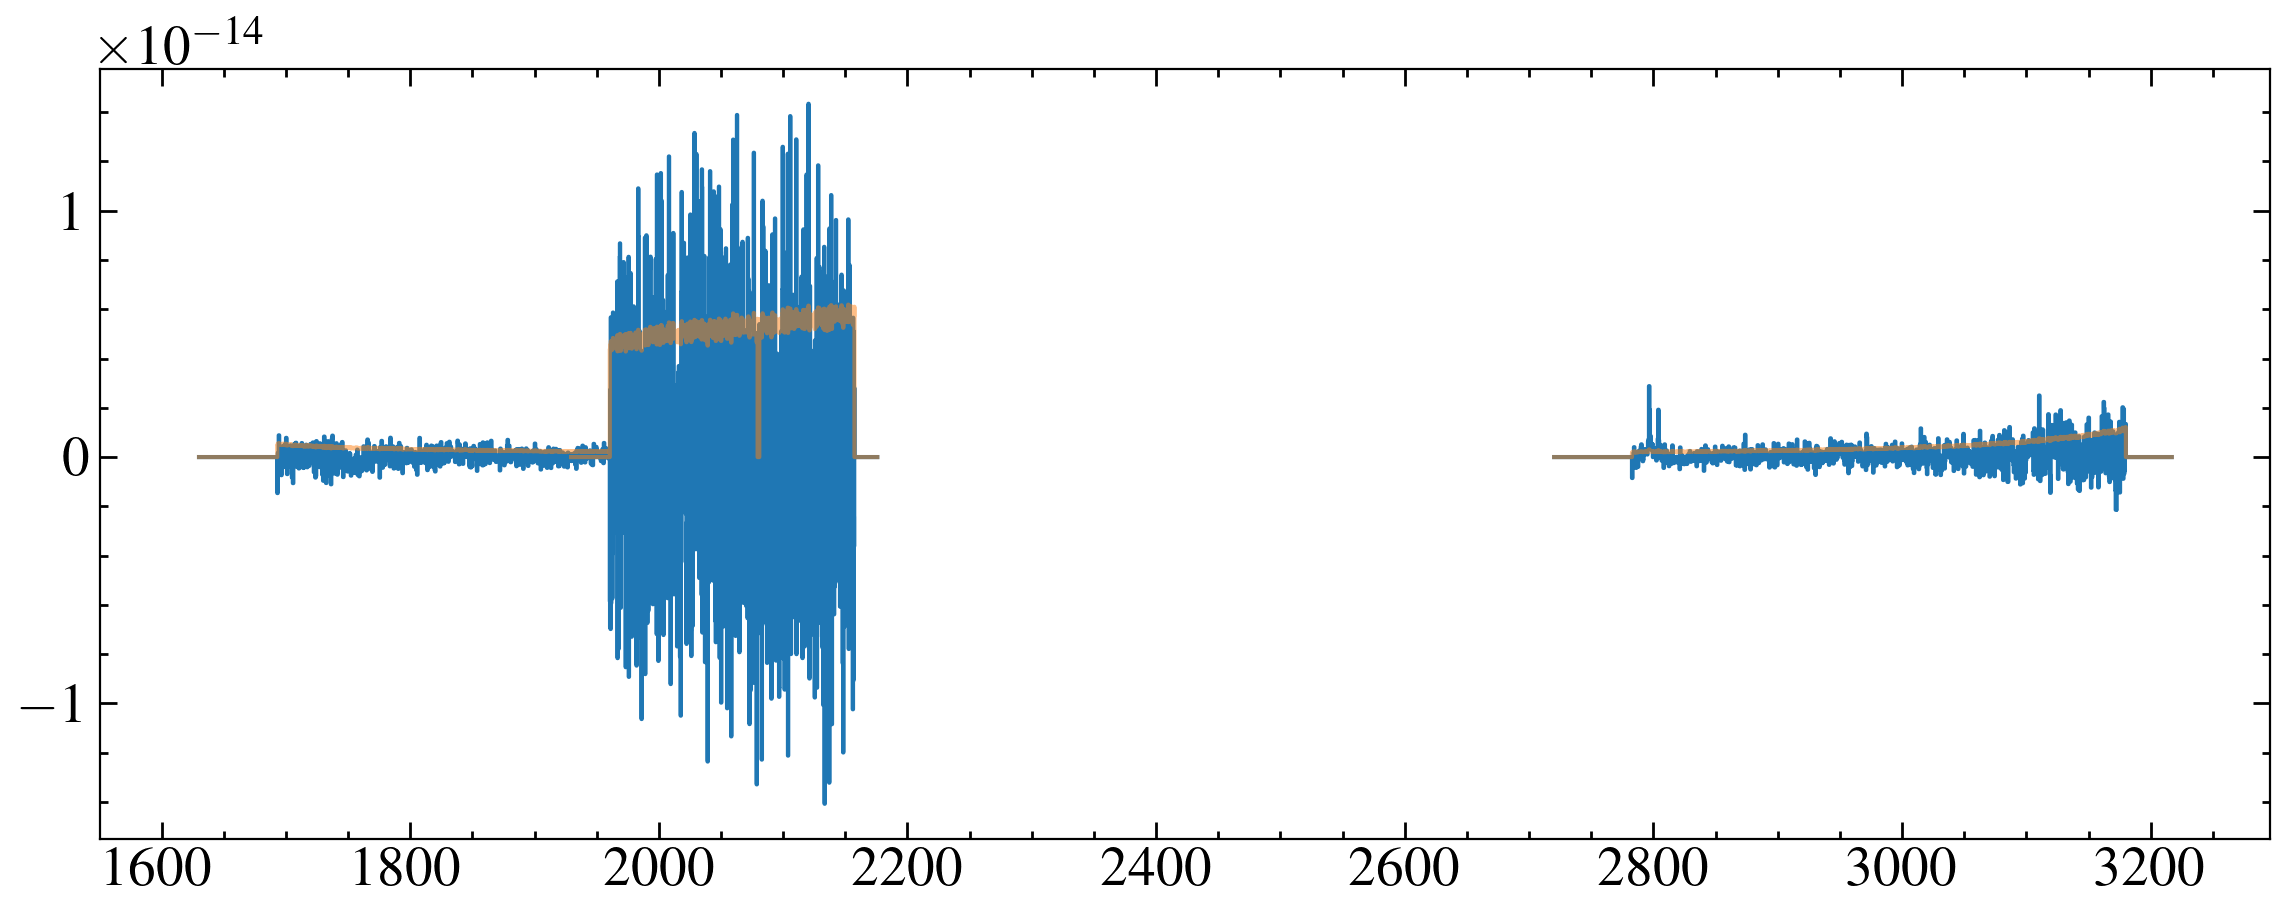

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm26010_x1dsum.fits
G130M


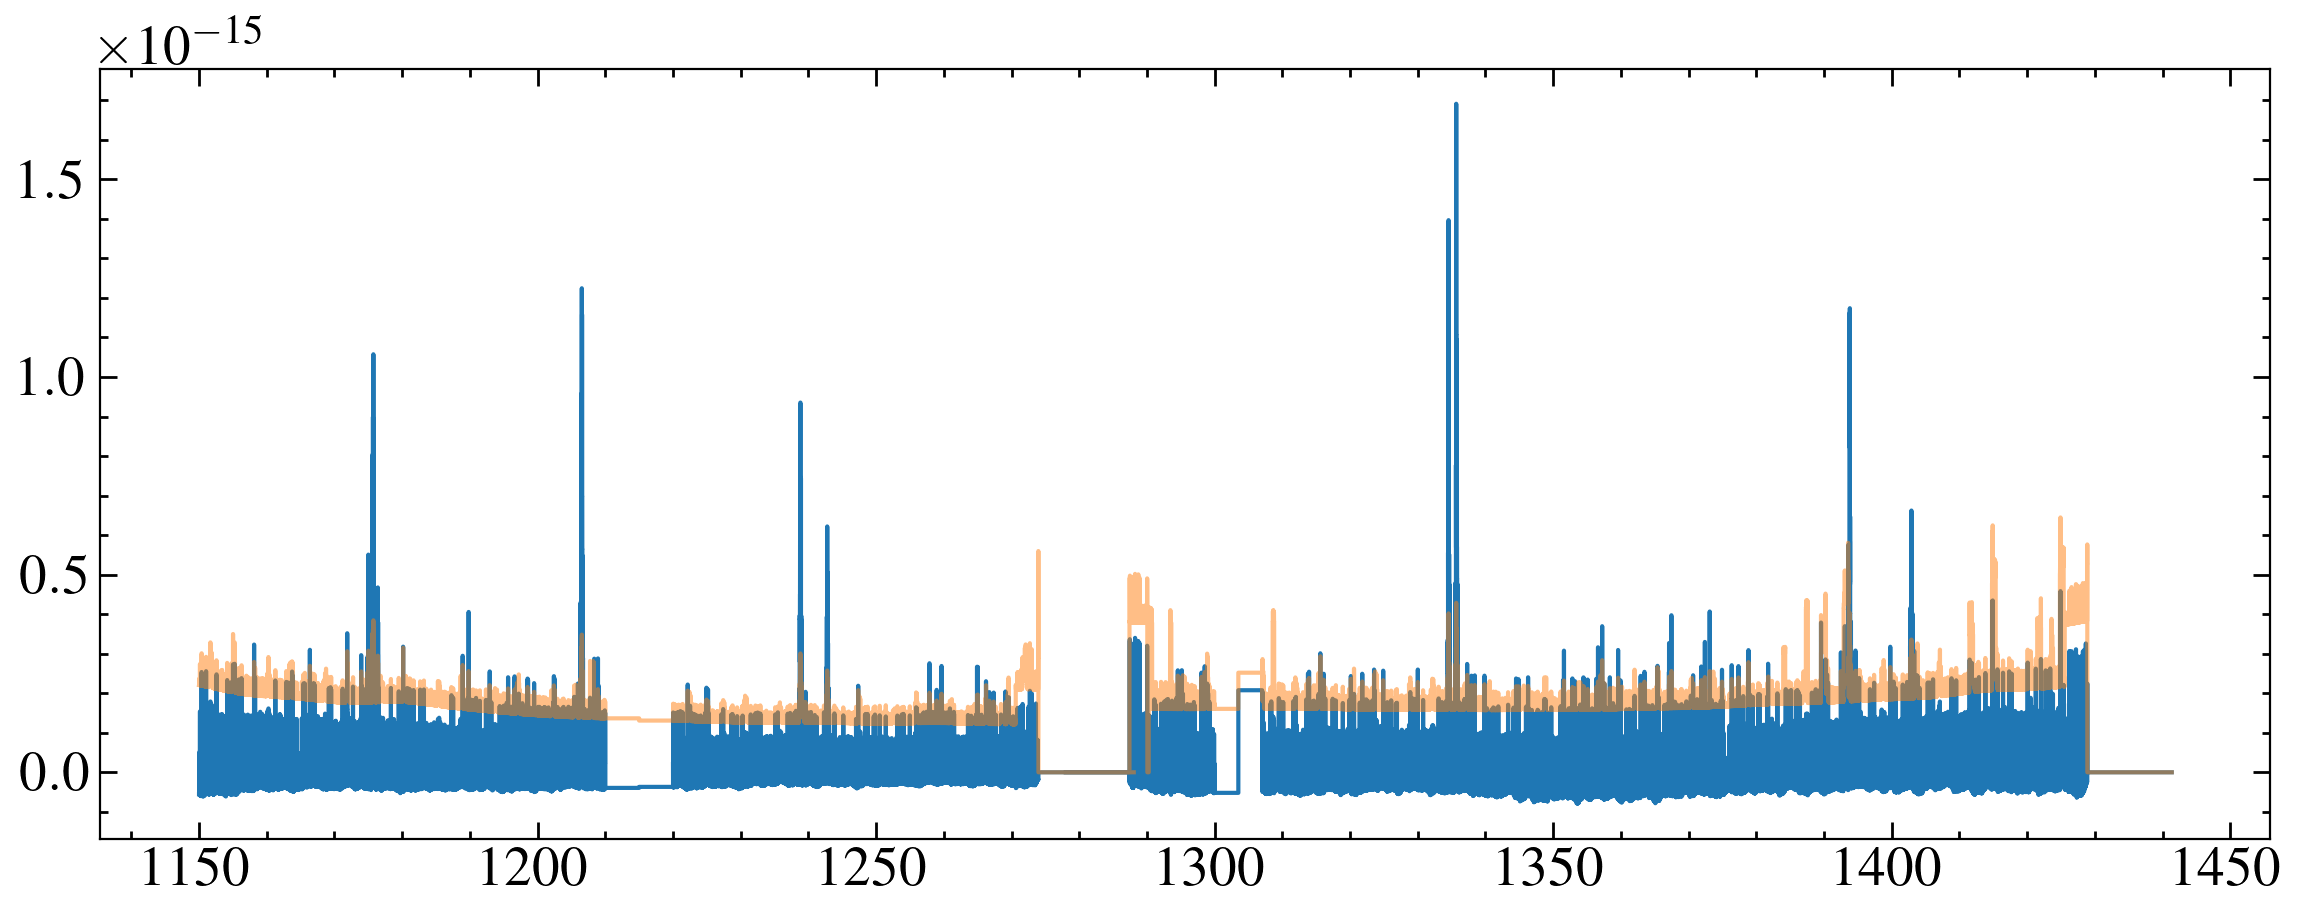

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm28020_x1dsum.fits
G230L


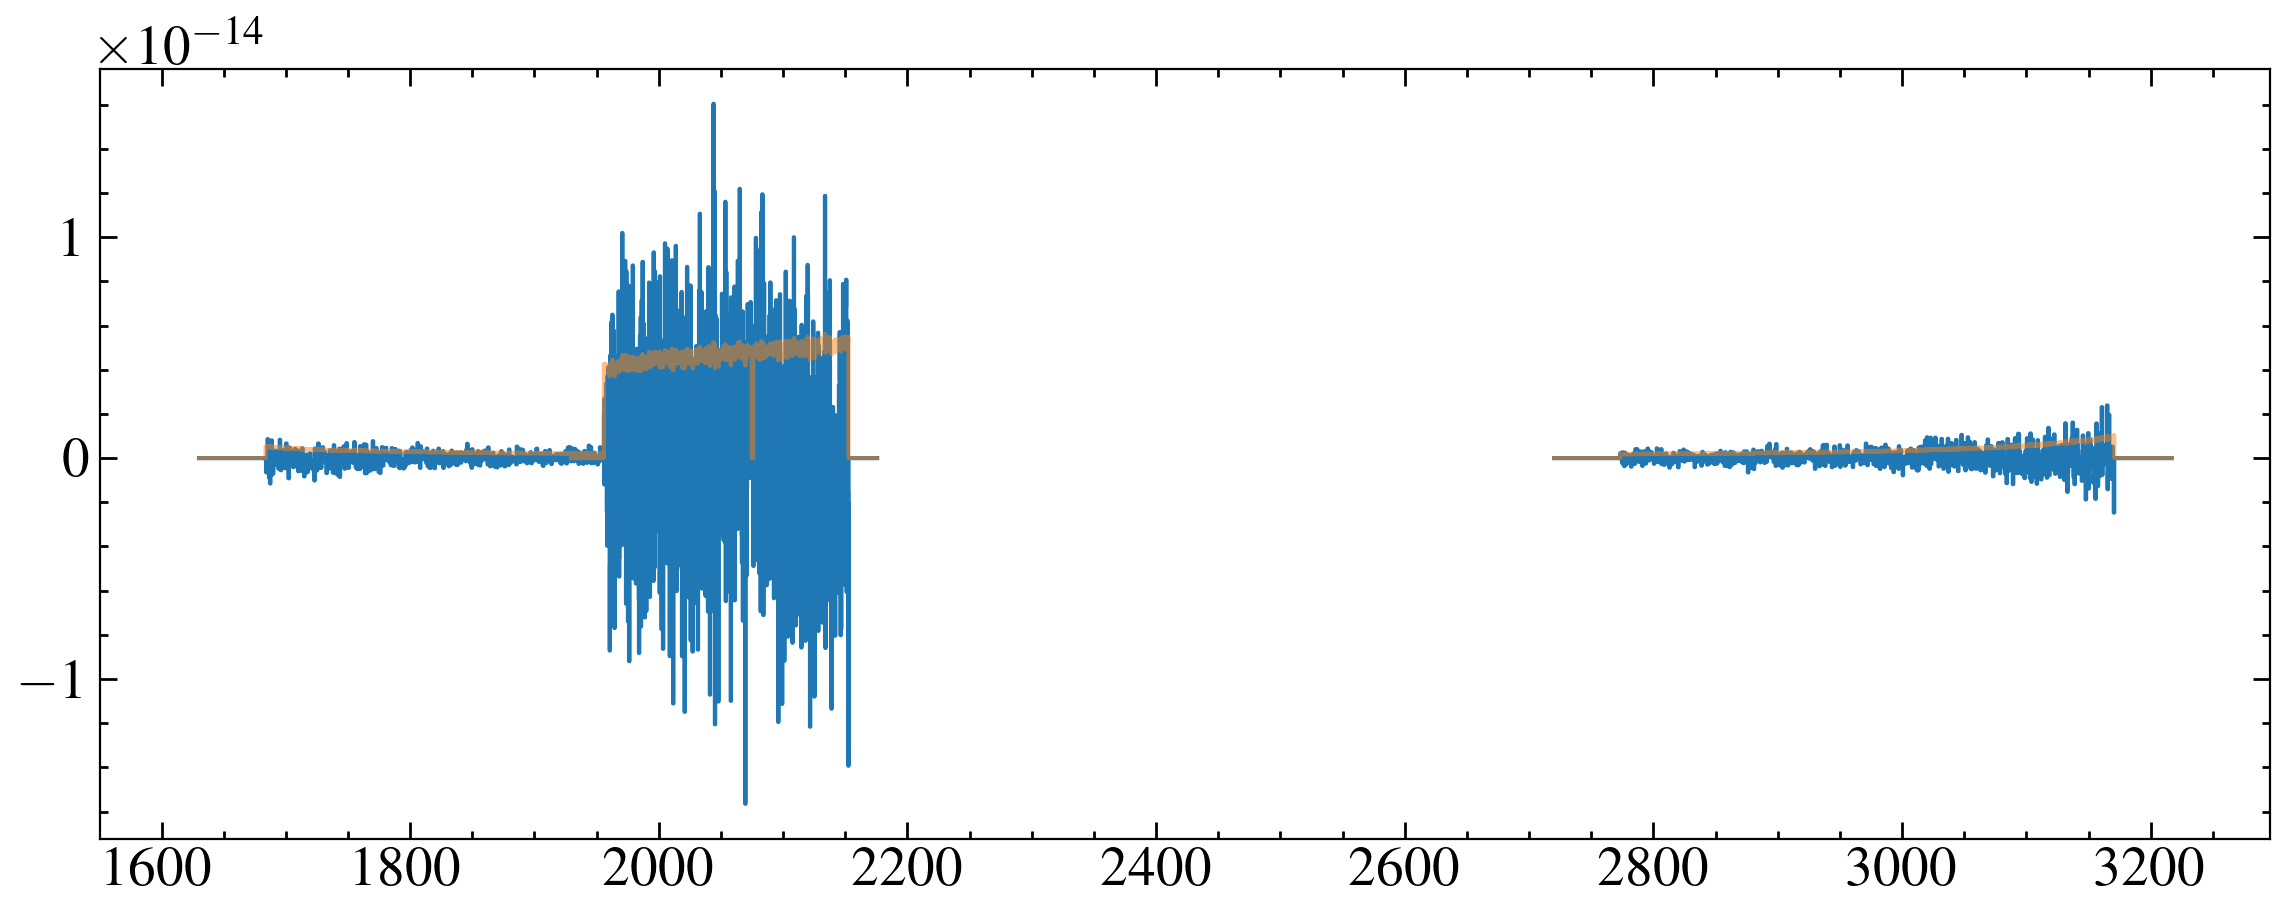

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm29010_x1dsum.fits
G130M


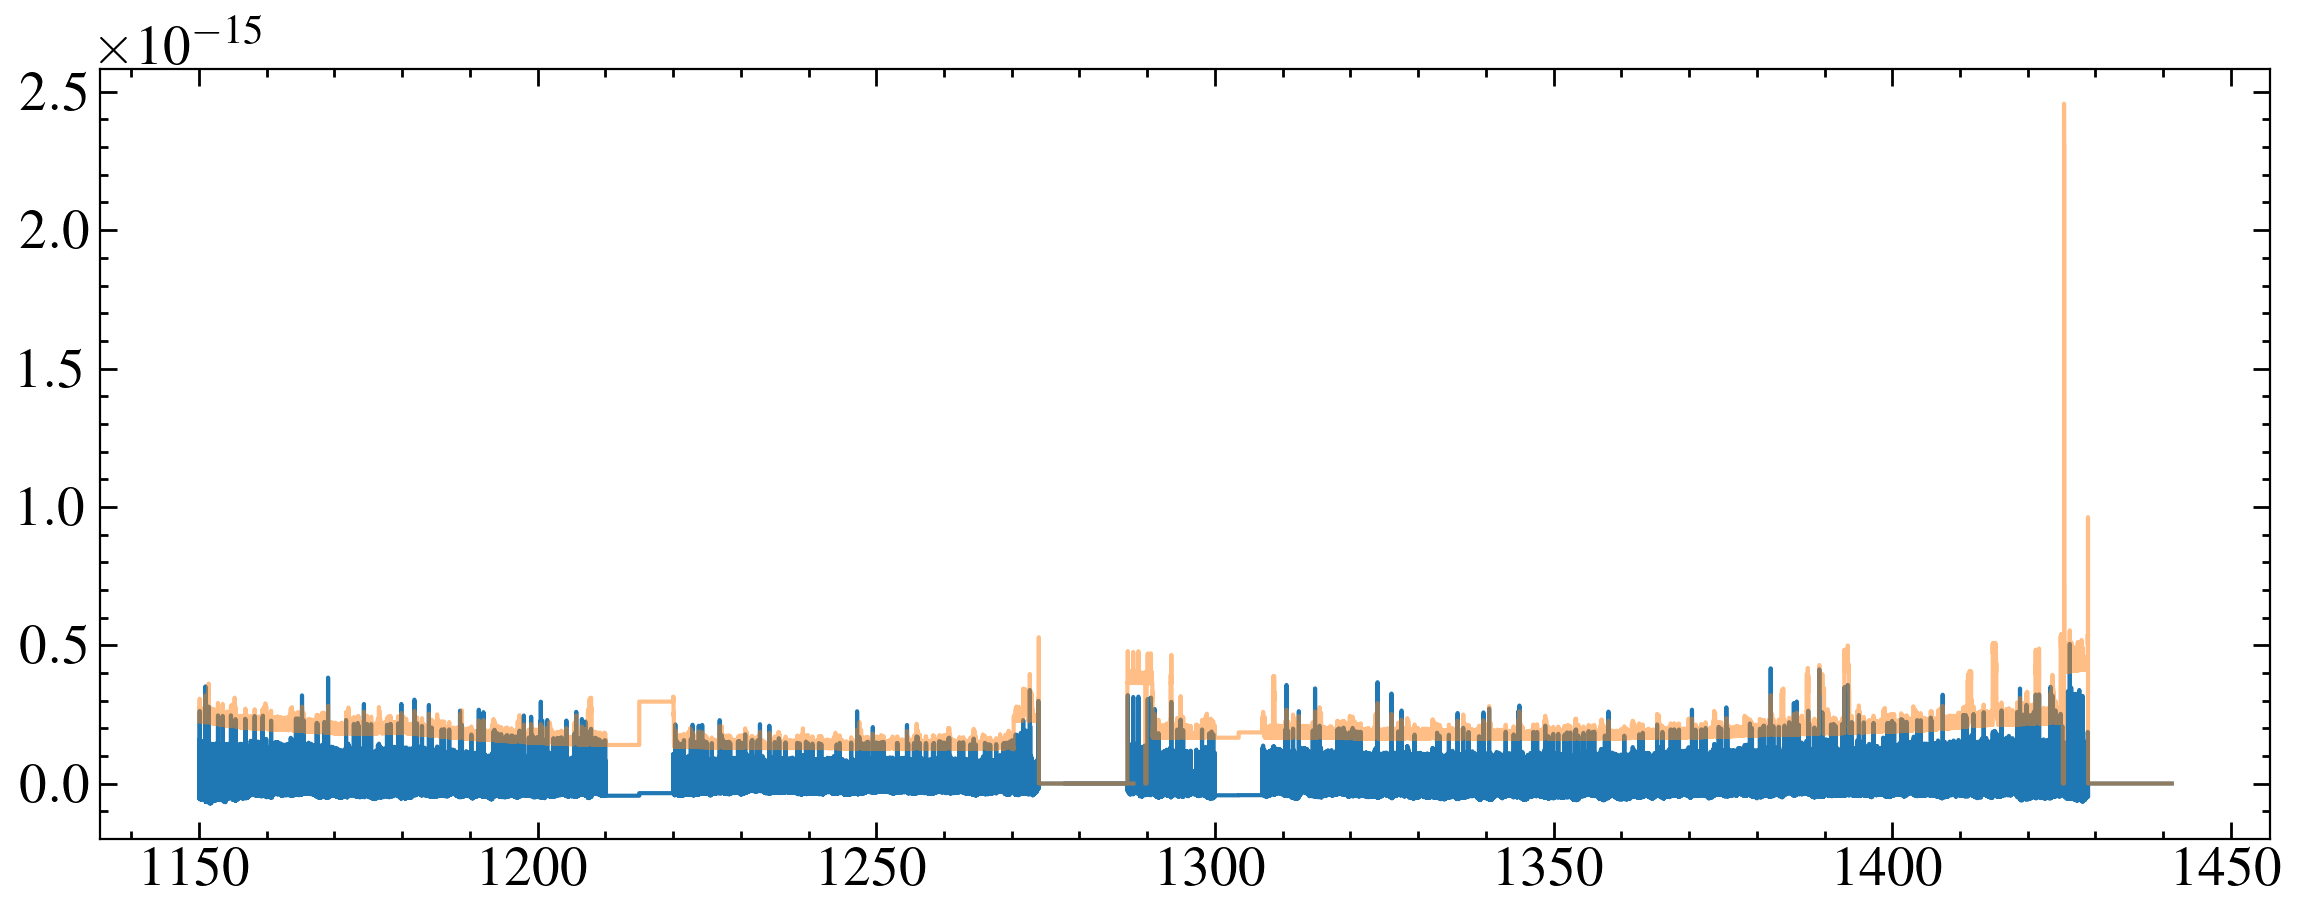

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm33010_x1dsum.fits
G130M


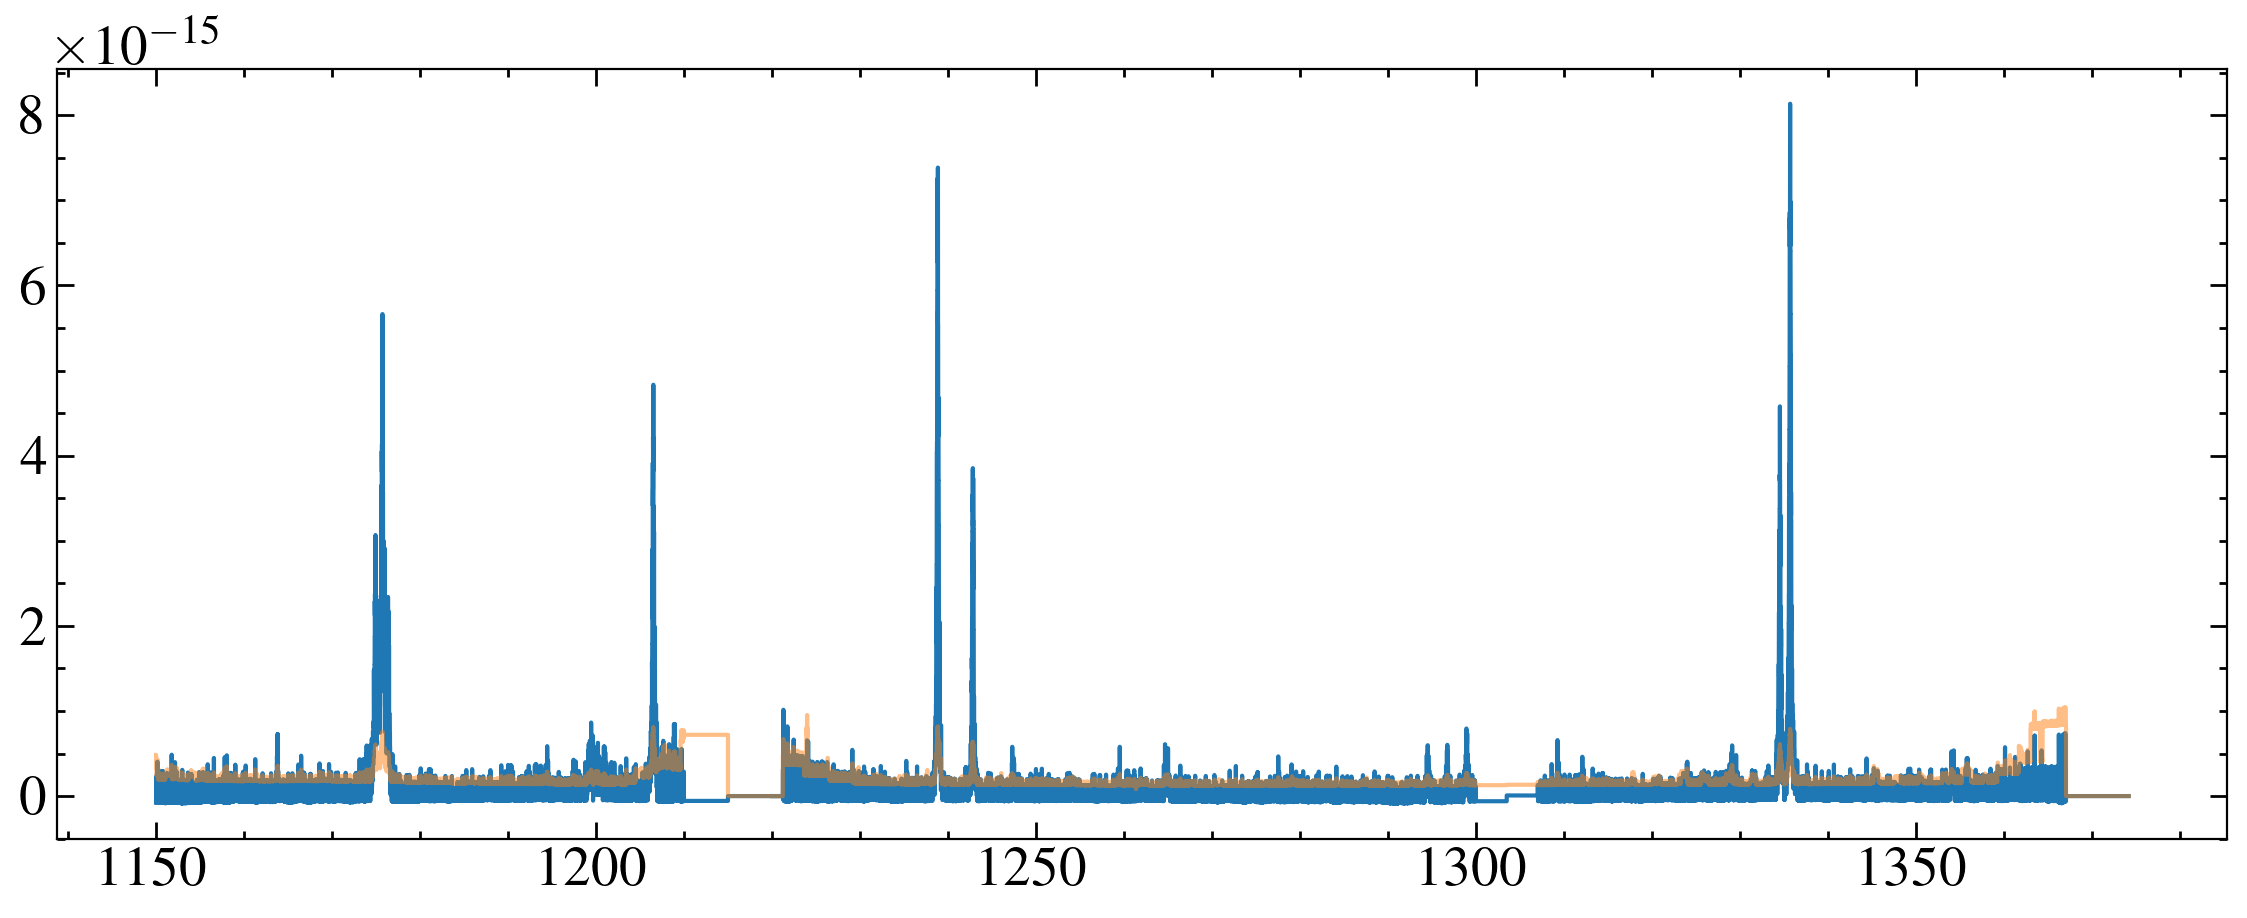

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm39010_x1dsum.fits
G160M


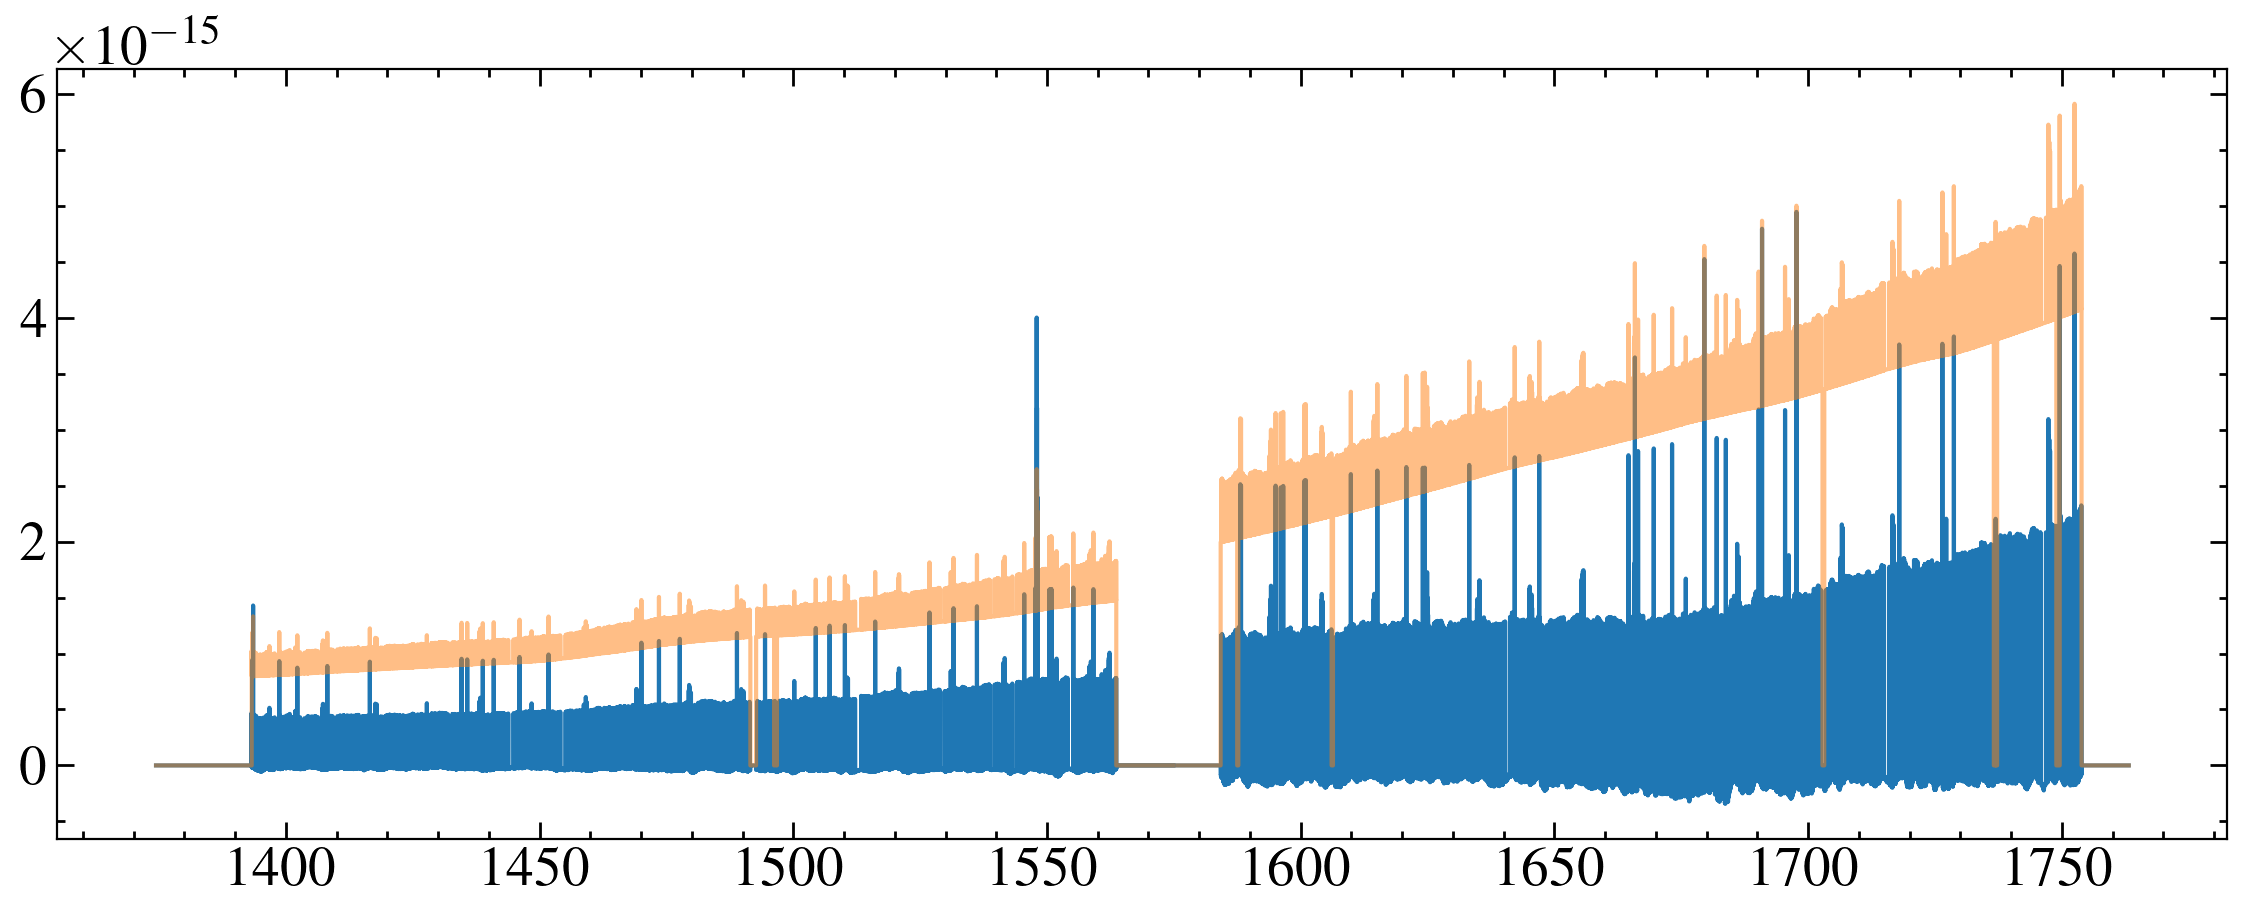

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm39020_x1dsum.fits
G160M


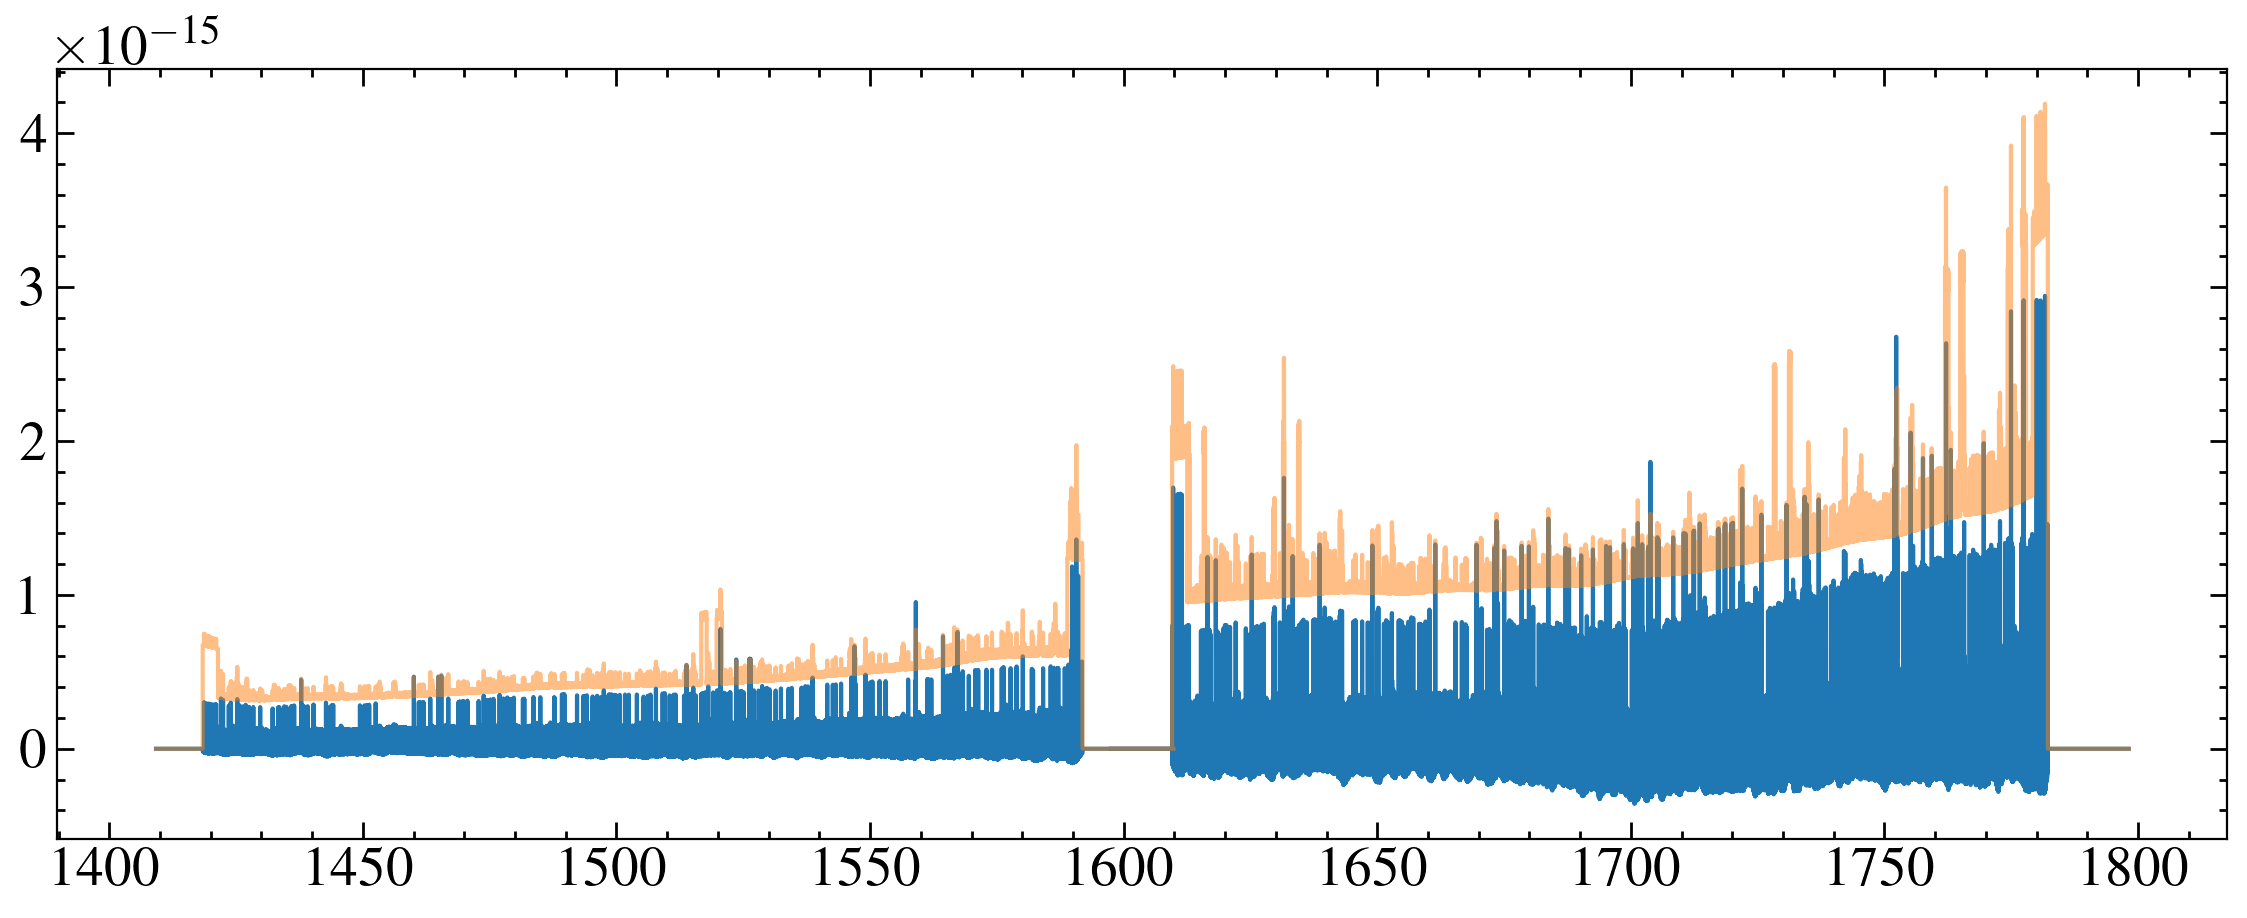

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm40010_x1dsum.fits
G130M


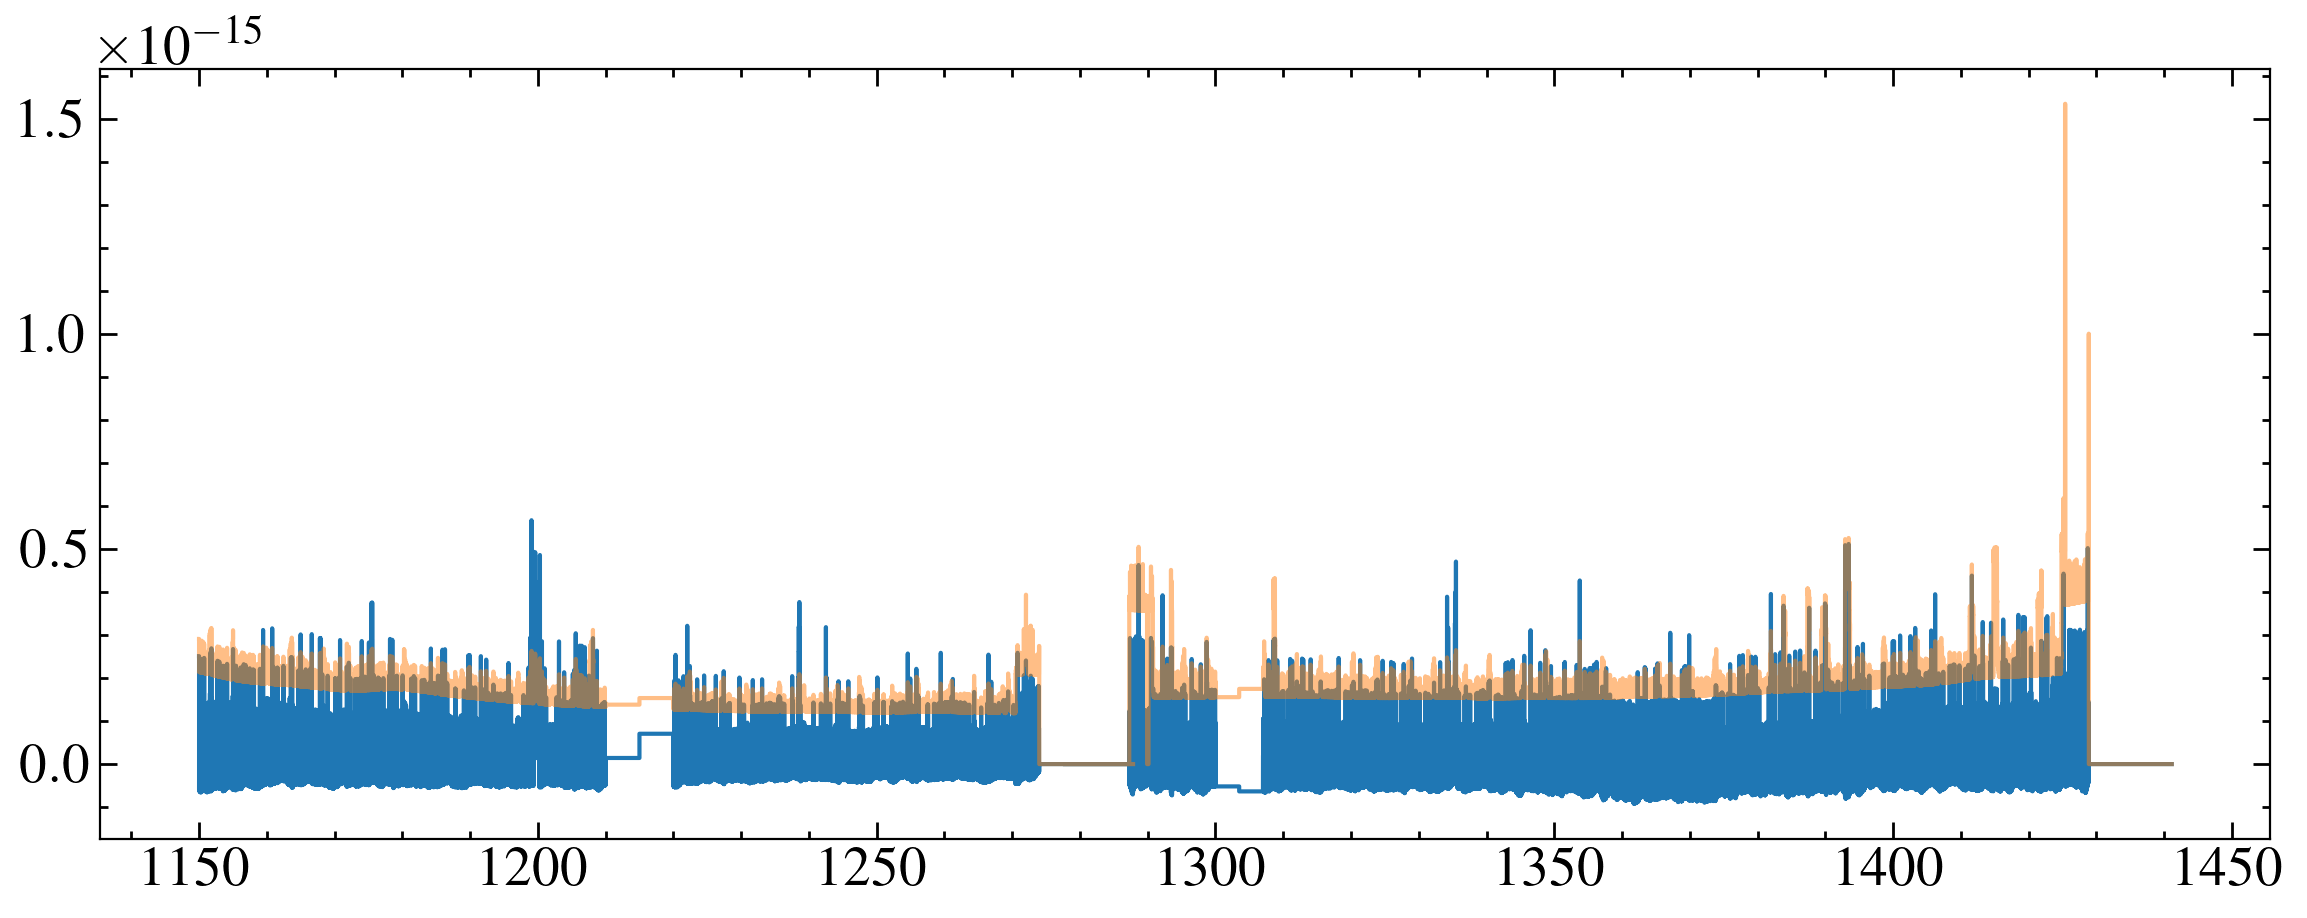

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm42010_x1dsum.fits
G230L


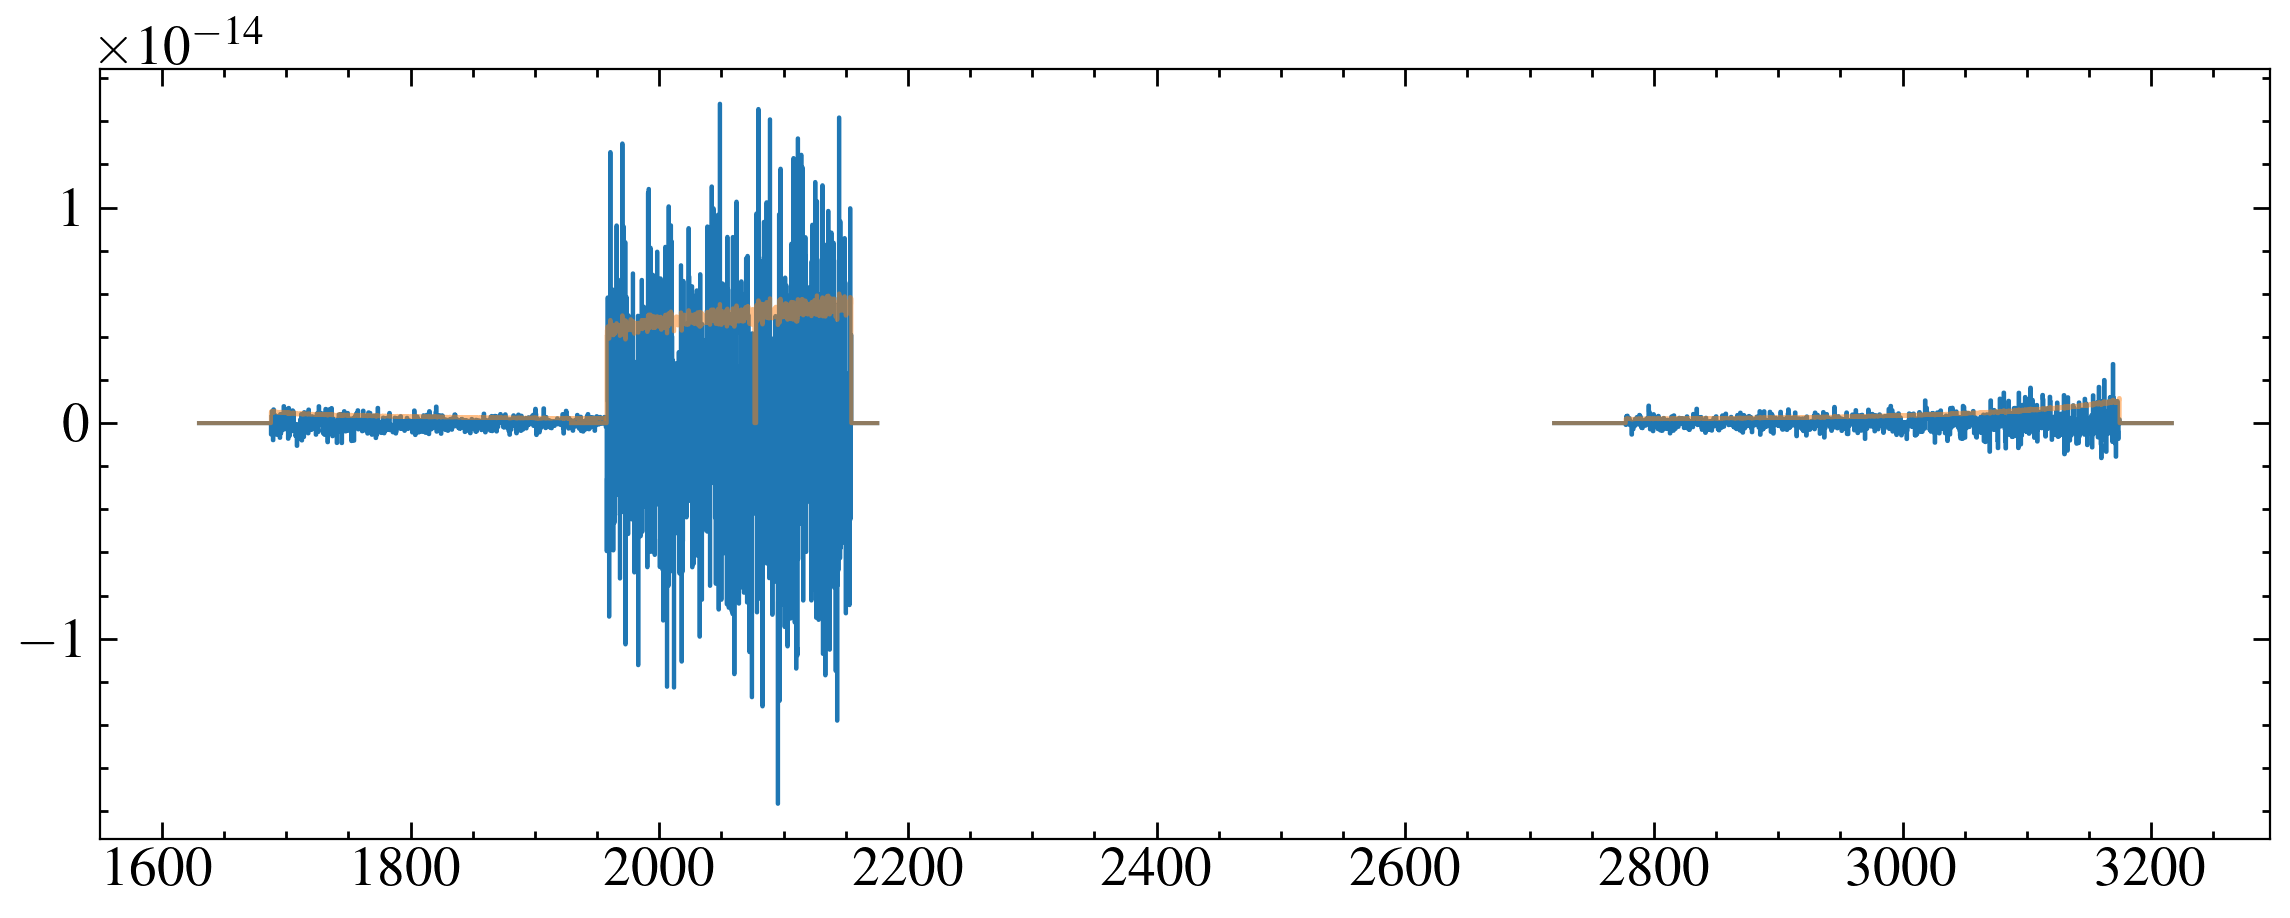

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlmz5010_x1dsum.fits
G130M


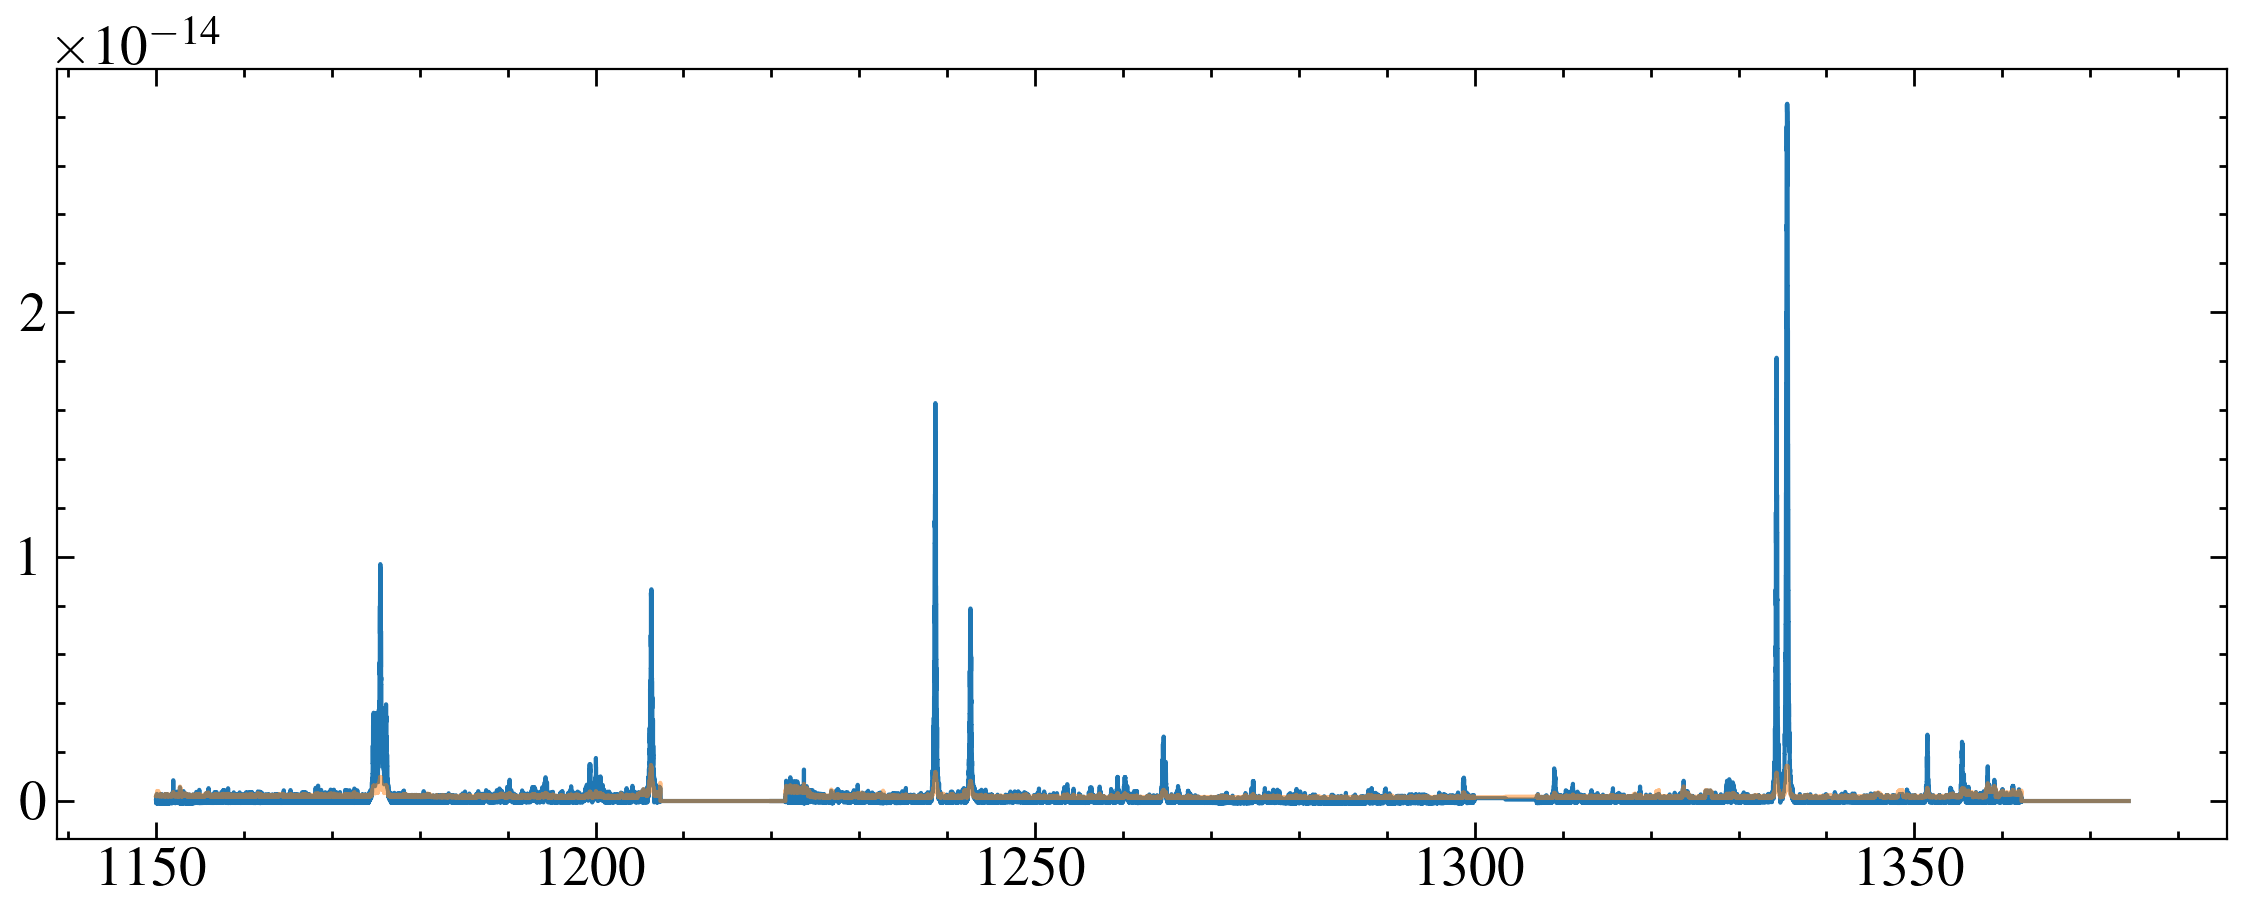

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlmz6010_x1dsum.fits
G160M


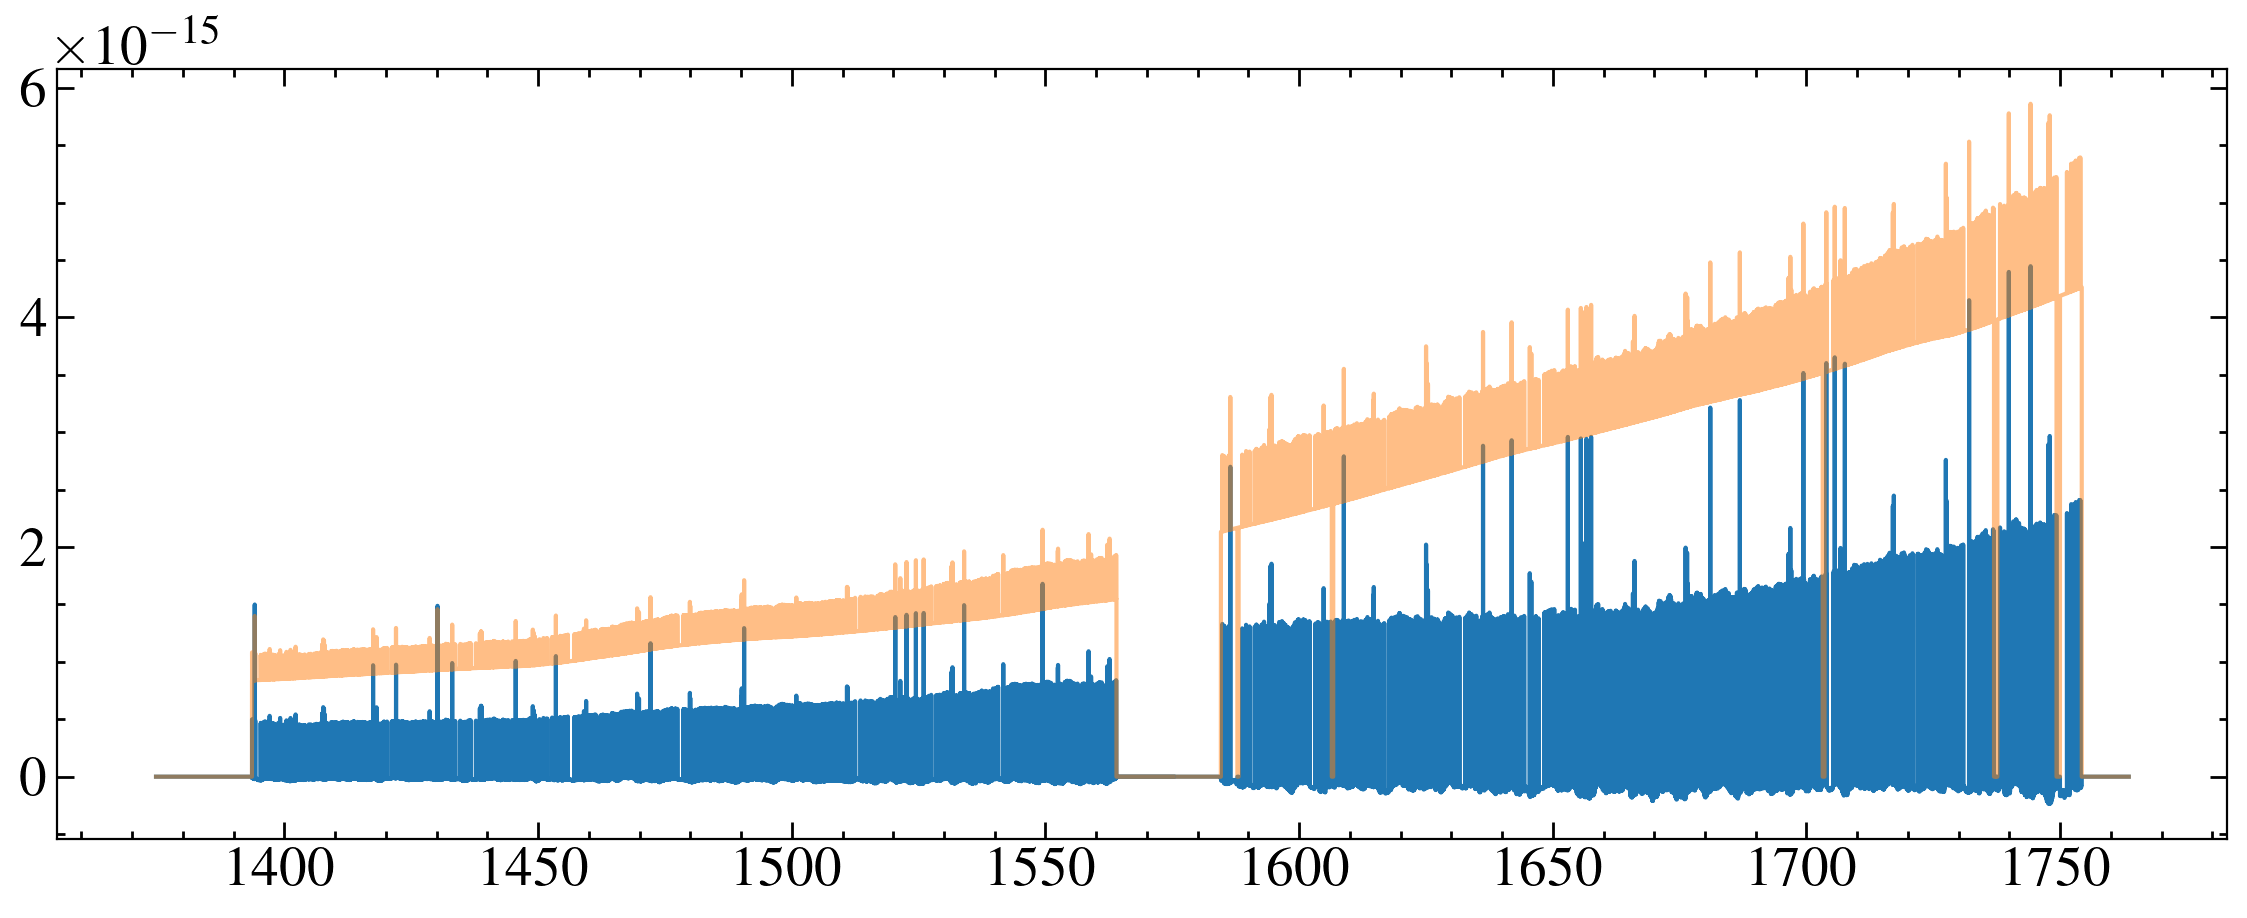

/media/david/2tb_ext_hd/hddata/mega_muscles/cos_x1ds/ldlm28010_x1dsum.fits
G160M


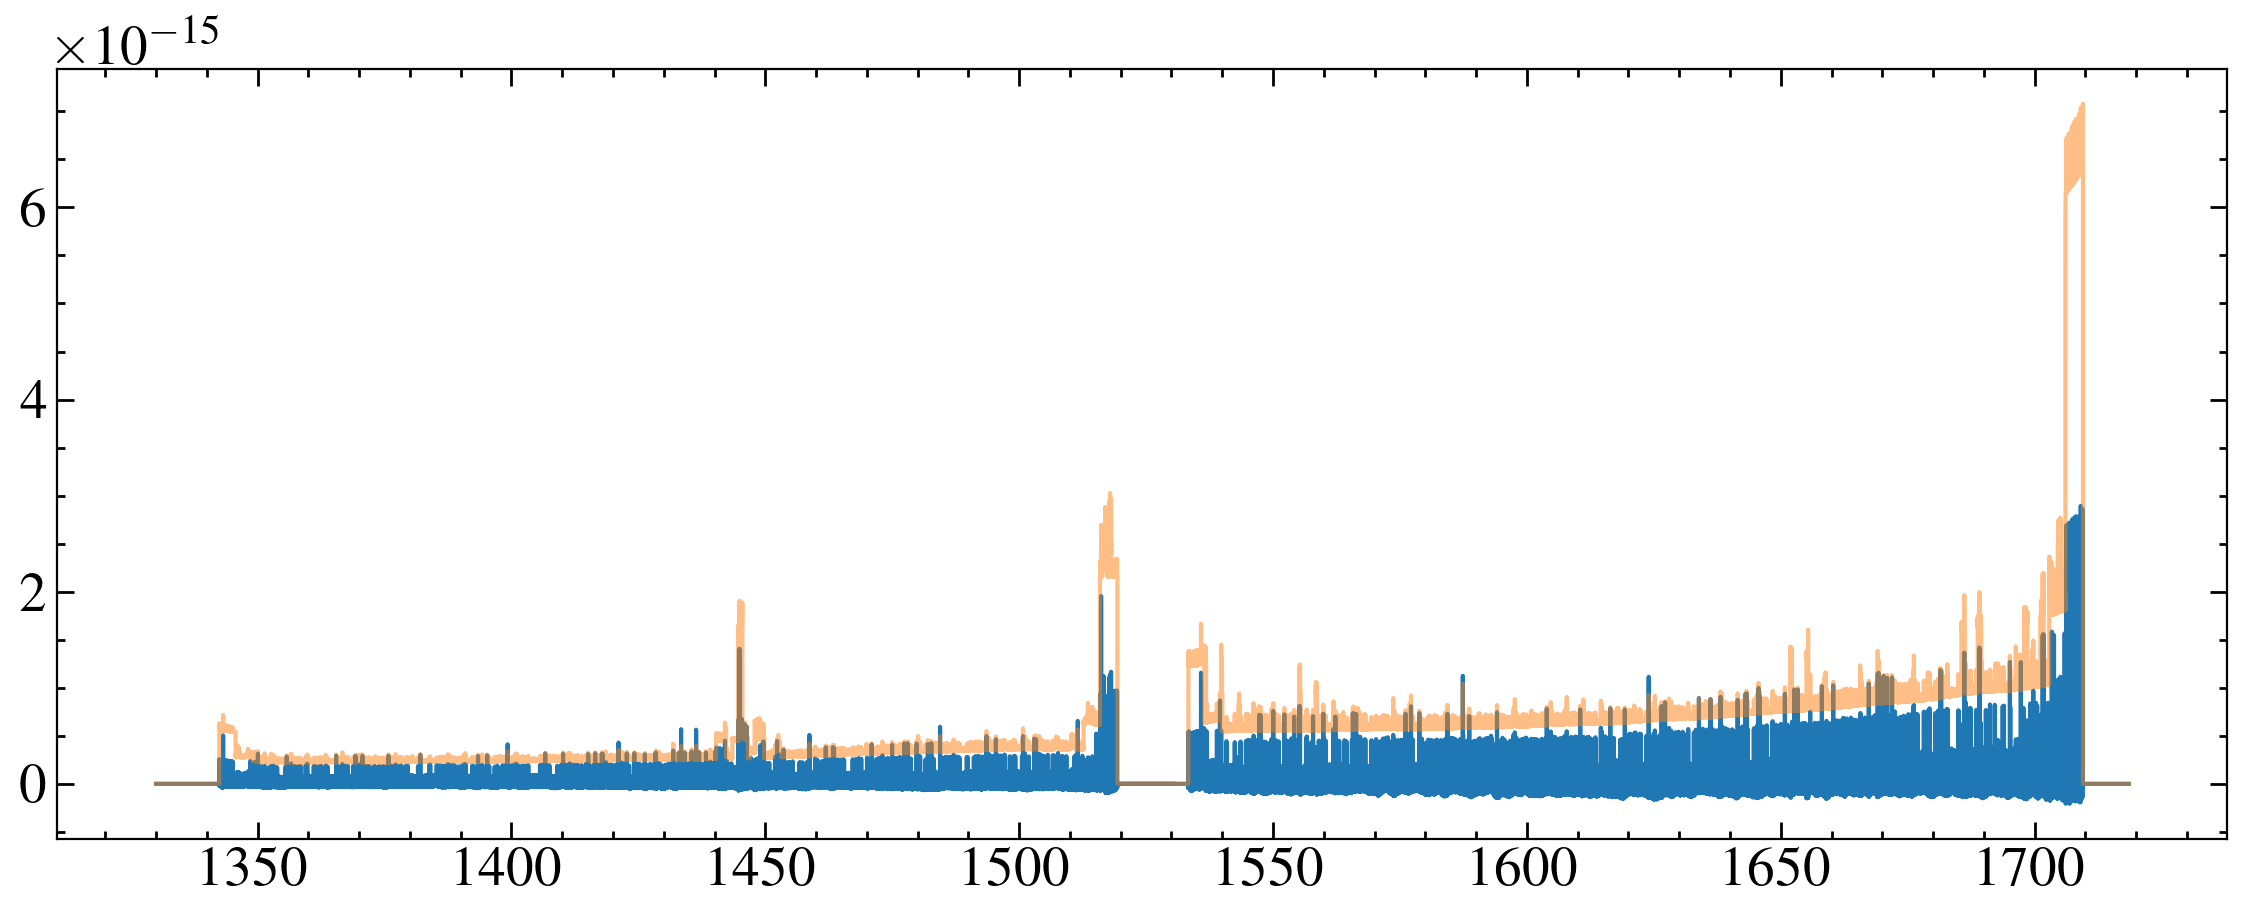

In [16]:
 for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    for dt in data:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = (w > 1150) & (w < 1210) | (w > 1220) & (w < 1300) | (w > 1307)
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        plt.step(w, e, where='mid', c='C1', alpha =0.5)
    plt.show()

Maybe only affected STIS?